<a href="https://colab.research.google.com/github/dkalenov/trading-bots-and-strategies/blob/main/Sloping_backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backtest

In [ ]:
symbol = 'APEUSDT'
auto_mode=True

## Drive Connection & DB

In [52]:
import pandas as pd
from google.colab import drive
import os

# Подключение к Google Drive
drive.mount('/content/drive')

# Указать путь к папке с файлами на Google Drive
shared_folder_path = '/content/drive/MyDrive/Sloping bot'

# Указать пути к файлам параметров и результатов бэктеста
params_file_path = f'{shared_folder_path}/optimized_params.csv'
results_file_path = f'{shared_folder_path}/backtest_results.csv'

# Проверка существования файла с оптимизированными параметрами
if os.path.exists(params_file_path):
    optimized_params = pd.read_csv(params_file_path)
else:
    params_columns = [
        'Symbol', 'Interval', 'Start Date', 'End Date', 'Test Return [%]',
        'window_length', 'min_space', 'sloping_atr_length', 'stop_loss_multiplier',
        'take_profit_multiplier'
    ]
    optimized_params = pd.DataFrame(columns=params_columns)

# Проверка существования файла с результатами бэктеста
if os.path.exists(results_file_path):
    backtest_results = pd.read_csv(results_file_path)
else:
    backtest_results_columns = [
        'Symbol', 'Interval', 'Start Date', 'End Date', 'Total Trades', 'Total PNL', 'Percentage PNL (%)',
        'Win Rate (%)', 'Profit Factor', 'Risk Ratio',
        'Num Long Trades', 'Num Short Trades', 'Num Profitable Trades', 'Num Unprofitable Trades',
        'Avg Profit', 'Avg Loss', 'Max Profit', 'Min Profit', 'Max Loss', 'Min Loss',
        'Avg Long Duration (days)', 'Avg Long Duration (hours)', 'Avg Long Duration (minutes)', 'Avg Long Duration (seconds)',
        'Avg Short Duration (days)', 'Avg Short Duration (hours)', 'Avg Short Duration (minutes)', 'Avg Short Duration (seconds)',
        'window_length', 'min_space', 'sloping_atr_length', 'stop_loss_multiplier', 'take_profit_multiplier'
    ]
    backtest_results = pd.DataFrame(columns=backtest_results_columns)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# import pandas as pd
# from google.colab import drive
# import os

# # Connect to Google Drive
# drive.mount('/content/drive')

# # Specify the path to the shared folder on Google Drive
# shared_folder_path = '/content/drive/MyDrive/Sloping bot'

# # Load existing DataFrames or create new ones
# params_file_path = f'{shared_folder_path}/optimized_params.xlsx'
# results_file_path = f'{shared_folder_path}/backtest_results.xlsx'

# # Check if the optimized parameters file exists
# if os.path.exists(params_file_path):
#     optimized_params = pd.read_excel(params_file_path)
# else:
#     params_columns = [
#         'Symbol', 'Interval', 'Start Date', 'End Date', 'Test Result',
#         'min_space', 'sloping_atr_length', 'stop_loss_multiplier',
#         'take_profit_multiplier', 'window_length'
#     ]
#     optimized_params = pd.DataFrame(columns=params_columns)

# # Check if the backtest results file exists
# if os.path.exists(results_file_path):
#     backtest_results = pd.read_excel(results_file_path)
# else:
#     backtest_results_columns = [
#         'Symbol', 'Interval', 'Total Trades', 'Total PNL', 'Percentage PNL (%)',
#         'Win Rate (%)', 'Profit Factor', 'Risk Ratio',
#         'Num Long Trades', 'Num Short Trades', 'Num Profitable Trades', 'Num Unprofitable Trades',
#         'Avg Profit', 'Avg Loss', 'Max Profit', 'Min Profit', 'Max Loss', 'Min Loss',
#         'Avg Long Duration (days)', 'Avg Long Duration (hours)', 'Avg Long Duration (minutes)', 'Avg Long Duration (seconds)',
#         'Avg Short Duration (days)', 'Avg Short Duration (hours)', 'Avg Short Duration (minutes)', 'Avg Short Duration (seconds)'
#     ]
#     backtest_results = pd.DataFrame(columns=backtest_results_columns)


## Imports

In [54]:
!pip install pandas_ta
import pandas_ta as ta
!pip install backtesting
!pip install hyperopt

In [55]:
# УСТАНОВКА TA-LIB В COLAB
# Устанавливаем предварительно скомпилированные файлы библиотеки TA-Lib
!pip install pandas==1.5.3
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
%cd ..
!pip install ta-lib

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


--2024-11-13 09:30:35--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-11-13 09:30:35--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-11-13 09:30:35--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

In [56]:
!pip install pandas==2.2.2

  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


In [57]:
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
import os
import requests
import zipfile
import csv
import io
import backtesting
from backtesting.lib import crossover

In [58]:
# import pandas as pd

# # Создаем пустой DataFrame с для хранения данных
# columns = [
#     'Symbol', 'Interval', 'Total Trades', 'Total PNL', 'Percentage PNL (%)',
#     'Win Rate (%)', 'Profit Factor', 'Risk Ratio',
#     'Num Long Trades', 'Num Short Trades', 'Num Profitable Trades', 'Num Unprofitable Trades',
#     'Avg Profit', 'Avg Loss', 'Max Profit', 'Min Profit', 'Max Loss', 'Min Loss',
#     'Avg Long Duration (days)', 'Avg Long Duration (hours)', 'Avg Long Duration (minutes)', 'Avg Long Duration (seconds)',
#     'Avg Short Duration (days)', 'Avg Short Duration (hours)', 'Avg Short Duration (minutes)', 'Avg Short Duration (seconds)'
# ]


# sloping_backtest_results = pd.DataFrame(columns=columns)

## Functions

### Get data and gnerate klines

In [59]:
def generate_months(start_date, end_date):
    """Генерирует список месяцев в заданном интервале."""
    start_date = datetime.strptime(start_date, '%Y-%m')
    end_date = datetime.strptime(end_date, '%Y-%m')
    months = []

    while start_date <= end_date:
        months.append(start_date.strftime('%Y-%m'))
        start_date = start_date + relativedelta(months=1)

    return months

def download_klines(symbol, interval, start_date, end_date):
    """Скачивает исторические данные свечей с Binance и возвращает DataFrame."""
    # Генерируем месяцы
    months = generate_months(start_date, end_date)

    # Создаем папки, если их нет
    if not os.path.exists('klines'):
        os.mkdir('klines')

    klines = {
        'Date': [],
        'Open': [],
        'High': [],
        'Low': [],
        'Close': [],
        'Volume': []
    }

    for month in months:
        filename = f"{symbol}-{interval}-{month}.zip"

        # Если нет klines, то скачиваем
        if not os.path.exists(f"klines/{filename}"):
            url = f"https://data.binance.vision/data/futures/um/monthly/klines/{symbol}/{interval}/{filename}"
            r = requests.get(url, allow_redirects=True)
            open(f"klines/{filename}", 'wb').write(r.content)

        # Открываем zip
        with zipfile.ZipFile(f"klines/{filename}", 'r') as zip_file:
            # Читаем csv внутри zip
            with zip_file.open(f"{symbol}-{interval}-{month}.csv", 'r') as csv_file:
                csv_reader = csv.reader(io.TextIOWrapper(csv_file, 'utf-8'))
                for row in csv_reader:
                    # Если строка содержит число (отбрасываем первую строку)
                    if row[0].isdigit():
                        # Заполняем списки с данными свечи
                        klines['Date'].append(datetime.fromtimestamp(int(row[0]) / 1000, tz=timezone.utc))
                        klines['Open'].append(float(row[1]))
                        klines['High'].append(float(row[2]))
                        klines['Low'].append(float(row[3]))
                        klines['Close'].append(float(row[4]))
                        klines['Volume'].append(float(row[5]))

    # Создаем DataFrame
    df = pd.DataFrame(klines)
    df['Date'] = pd.to_datetime(df['Date'])  # Конвертируем столбец 'Date' в datetime
    df.set_index('Date', inplace=True)

    return df

### Save data

In [60]:
import pandas as pd
import os
import shutil

def save_results_to_csv(df, shared_folder_path, file_name):
    csv_file_path = os.path.join(shared_folder_path, file_name)
    temp_file_path = f"{csv_file_path}.temp"

    # Проверка существования файла
    if os.path.exists(csv_file_path):
        # Загружаем текущие данные из файла
        existing_df = pd.read_csv(csv_file_path)

        # Конкатенируем текущие данные с новыми
        combined_df = pd.concat([existing_df, df], ignore_index=True)

        # Удаляем полностью дублирующиеся строки
        combined_df = combined_df.drop_duplicates(keep='first').reset_index(drop=True)
    else:
        print(f"Файл не существует, будет создан новый файл: {csv_file_path}")
        combined_df = df

    # Сохраняем обновленные данные во временный файл
    combined_df.to_csv(temp_file_path, index=False)

    # Резервное копирование старого файла перед заменой
    if os.path.exists(csv_file_path):
        backup_file_path = f"{csv_file_path}.backup"
        shutil.copy(csv_file_path, backup_file_path)
        print(f"Резервная копия создана: {backup_file_path}")

    # Перемещаем временный файл, заменяя старый файл
    os.replace(temp_file_path, csv_file_path)
    print(f"Обновленные данные сохранены в {csv_file_path}")



In [61]:
import os
import csv
import pandas as pd

# # Функция для сохранения результатов в CSV
# def save_optimized_results_to_csv(optimized_params, path):
#     optimized_params.to_csv(f'{path}/optimized_params.csv', index=False)
#     print("Results saved to CSV.")

# Из-за того, что приходится откатывать pandas для установки ta-lib, может возникать ошибка при сохранении DataFrame в CSV, для решения можно использовать данную функцию

# def save_optimized_results_to_csv(optimized_params, path, file_name):
#     csv_file_path = f'{path}/{file_name}'
#     # Use the built-in CSV library to write to the CSV file
#     with open(csv_file_path, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         # Write header
#         writer.writerow(optimized_params.columns)
#         # Write data
#         for index, row in optimized_params.iterrows():
#             writer.writerow(row)
#     print("Results saved to CSV.")


# import csv

# # Функция для сохранения параметров в CSV с использованием модуля csv
# def save_optimized_results_to_csv(optimized_params, path, file_name):
#     csv_file_path = f'{path}/{file_name}'

#     # Проверяем, существует ли файл
#     file_exists = os.path.isfile(csv_file_path)

#     # Открываем файл в режиме добавления (append), если он существует, иначе в режиме записи (write)
#     with open(csv_file_path, mode='a' if file_exists else 'w', newline='') as file:
#         writer = csv.writer(file)

#         # Записываем заголовки, если файл только что создан
#         if not file_exists:
#             writer.writerow(optimized_params.columns)

#         # Записываем строки из DataFrame
#         for index, row in optimized_params.iterrows():
#             writer.writerow(row)
#     print("Results saved to CSV.")

# Теперь вызов этой функции сохранит данные независимо от версии pandas


In [62]:
import pandas as pd
import os
import shutil

def update_csv_with_temp_backup(df, csv_file_path):
    temp_file_path = f"{csv_file_path}.temp"

    # Проверка существования файла
    if os.path.exists(csv_file_path):
        # Загружаем текущие данные из файла
        existing_df = pd.read_csv(csv_file_path)

        # Конкатенируем текущие данные с новыми
        combined_df = pd.concat([existing_df, df], ignore_index=True)

        # Удаляем полностью дублирующиеся строки
        combined_df = combined_df.drop_duplicates(keep='first').reset_index(drop=True)
    else:
        print(f"Файл не существует, будет создан новый файл: {csv_file_path}")
        combined_df = df

    # Сохраняем обновленные данные во временный файл
    combined_df.to_csv(temp_file_path, index=False)

    # Резервное копирование старого файла перед заменой
    if os.path.exists(csv_file_path):
        backup_file_path = f"{csv_file_path}.backup"
        shutil.copy(csv_file_path, backup_file_path)
        print(f"Резервная копия создана: {backup_file_path}")

    # Перемещаем временный файл, заменяя старый файл
    os.replace(temp_file_path, csv_file_path)
    print(f"Обновленные данные сохранены в {csv_file_path}")

# Пример использования функции
# Подготовка новых данных для добавления в optimized_params.csv или backtest_results.csv


In [63]:
# Функция для создания записи параметров
def create_optimized_params_row(best_params, best_loss, symbol, interval, start_date, end_date):
    return {
        'Symbol': symbol,
        'Interval': interval,
        'Start Date': start_date,
        'End Date': end_date,
        'Test Return [%]': best_loss,
        'window_length': best_params['window_length'],
        # 'min_space': best_params['min_space'],
        'sloping_atr_length': best_params['sloping_atr_length'],
        'stop_loss_multiplier': best_params['stop_loss_multiplier'],
        'take_profit_multiplier': best_params['take_profit_multiplier']
    }

### Optimization

In [64]:
from hyperopt import fmin, tpe, hp, Trials

def hyperopt_optimizer(data, symbol, interval, start_date, end_date, auto_mode=True, max_evals=5, next_evals=3, shared_folder_path=shared_folder_path):
    global optimized_params
    auto_mode = auto_mode
    attempts = 0
    best_loss = float('inf')
    file_name = 'optimized_params.csv'


    def objective(params):
        window_length = int(params['window_length'])
        # min_space = int(params['min_space'])
        sloping_atr_length = int(params['sloping_atr_length'])
        take_profit_multiplier = params['take_profit_multiplier']
        stop_loss_multiplier = params['stop_loss_multiplier']

        bt = backtesting.Backtest(data=data,
                      strategy=SlopingStrategy,
                      cash=1_000_000,
                      commission=0.0005)

        stats = bt.run(
            window_length=window_length,
            # min_space=min_space,
            sloping_atr_length=sloping_atr_length,
            take_profit_multiplier=take_profit_multiplier,
            stop_loss_multiplier=stop_loss_multiplier)

        return -stats['Return [%]']

    space = {
        'window_length': hp.quniform('window_length', 10, 80, 2),
        # 'min_space': hp.quniform('min_space', 1, 20, 1),
        'sloping_atr_length': hp.quniform('sloping_atr_length', 5, 30, 1),
        'take_profit_multiplier': hp.uniform('take_profit_multiplier', 1.0, 4.),
        'stop_loss_multiplier': hp.uniform('stop_loss_multiplier', 1.0, 4.0)
    }

    trials = Trials()

    if auto_mode:
      while attempts < 3:
          # Запуск оптимизации
          best_params = fmin(objective,
                      space,
                      algo=tpe.suggest,
                      max_evals=max_evals,
                      trials=trials
                      )

          # Обновление текущей наименьшей убыточности
          current_loss = min(trial['result']['loss'] for trial in trials.trials)
          print("Лучшие параметры:", best_params)


          # Сохраняем данные
          new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
          # Ensure new_row is not empty before concatenation
          if any(new_row.values()):
              optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
          save_results_to_csv(optimized_params, shared_folder_path, file_name)


          # Проверка, нужно ли повторить попытку или завершить оптимизацию
          if current_loss > 50: # если более 50 (50% убыток), то скорее всего мы так и не преблизимся к профиту, лучше заново инициализировать поиск
              attempts += 1
              print(f'Текущий Return [%] {-current_loss}. Сликшом далеко до профита')
              trials = Trials()  # Очищаем trials для новой попытки
              continue

          else:
              # Успешная попытка, продолжаем оптимизацию
              while current_loss < best_loss:
                  best_loss = current_loss

                  best_params = fmin(objective,
                              space,
                              algo=tpe.suggest,
                              max_evals=max_evals + next_evals,
                              trials=trials
                              )

                  max_evals += next_evals
                  current_loss = min(trial['result']['loss'] for trial in trials.trials)
                  print("Лучшие параметры:", best_params)

                  # Сохраняем данные
                  if current_loss < best_loss:
                    new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
                    # Ensure new_row is not empty before concatenation
                    if any(new_row.values()):
                        optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
                    save_results_to_csv(optimized_params, shared_folder_path, file_name)

              # Завершаем цикл, если не достигнуты минимальные потери
              attempts = 3

    # Вручную задаём количество итераций
    else:
        while True:
            best_params = fmin(objective,
                        space,
                        algo=tpe.suggest,
                        max_evals=max_evals,
                        trials=trials)

            current_loss = min(trial['result']['loss'] for trial in trials.trials)
            print("Лучшие параметры:", best_params)

            new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
            if any(new_row.values()):
                optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
            save_results_to_csv(optimized_params, shared_folder_path, file_name)


            user_input = input("Продолжить поиск? Введите количество дополнительных итераций или 'no', 0 для завершения: ").strip()
            if user_input.lower() in ['no', 'n', '0']:
                print("Manual optimization ended.")
                break

            try:
                continuation_rounds = int(user_input)
                if continuation_rounds <= 0:
                    print("Завершаем подбор параметров.")
                    break

                # Продолжаем оптимизацию
                else:
                  best_loss = current_loss
                  best_params = fmin(objective,
                              space,
                              algo=tpe.suggest,
                              max_evals=max_evals + continuation_rounds,
                              trials=trials)
                  max_evals += continuation_rounds
                  current_loss = min(trial['result']['loss'] for trial in trials.trials)
                  print("Лучшие параметры:", best_params)
                  # Сохраняем параметры
                  if current_loss < best_loss:
                    new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
                    if any(new_row.values()):
                        optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
                    save_results_to_csv(optimized_params, shared_folder_path, file_name)


            except ValueError:
                print("Вы неверно ввели количество итераций. Попробуйте сново")

    return best_params

### Get Backtest Data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

initial_capital = 1_000_000

def get_backtest_data(trades, initial_capital=initial_capital):
    # Разделение сделок на лонг и шорт
    long_trades = trades[trades['Size'] > 0].copy()
    short_trades = trades[trades['Size'] < 0].copy()
    num_long_trades = len(long_trades)
    num_short_trades = len(short_trades)

    # Подсчет прибыльных и убыточных сделок
    profitable_trades = trades[trades['PnL'] > 0]
    unprofitable_trades = trades[trades['PnL'] <= 0]
    num_profitable_trades = len(profitable_trades)
    num_unprofitable_trades = len(unprofitable_trades)

    # Средняя прибыль и убыток
    avg_profit = profitable_trades['PnL'].mean() if num_profitable_trades > 0 else 0
    avg_loss = unprofitable_trades['PnL'].mean() if num_unprofitable_trades > 0 else 0

    # Средняя продолжительность сделок в лонг и шорт
    avg_long_duration = (long_trades['ExitTime'] - long_trades['EntryTime']).mean() if num_long_trades > 0 else pd.Timedelta(0)
    avg_short_duration = (short_trades['ExitTime'] - short_trades['EntryTime']).mean() if num_short_trades > 0 else pd.Timedelta(0)

    # Общая прибыль/убыток и процентное изменение от начального капитала
    total_profit = trades['PnL'].sum()
    percentage_profit_loss = (total_profit / initial_capital) * 100

    # Соотношение риска и интерпретация
    risk_ratio = abs(avg_loss / avg_profit) if avg_profit != 0 else float('inf')

    # Метрики продолжительности сделок
    avg_long_days, avg_long_hours, avg_long_minutes, avg_long_seconds = avg_long_duration.components[:4]
    avg_short_days, avg_short_hours, avg_short_minutes, avg_short_seconds = avg_short_duration.components[:4]

    # Дополнительные метрики
    max_profit = profitable_trades['PnL'].max() if num_profitable_trades > 0 else 0
    min_profit = profitable_trades['PnL'].min() if num_profitable_trades > 0 else 0
    max_loss = unprofitable_trades['PnL'].min() if num_unprofitable_trades > 0 else 0
    min_loss = unprofitable_trades['PnL'].max() if num_unprofitable_trades > 0 else 0
    win_rate = (num_profitable_trades / len(trades)) * 100 if len(trades) > 0 else 0
    profit_factor = profitable_trades['PnL'].sum() / abs(unprofitable_trades['PnL'].sum()) if num_unprofitable_trades > 0 else float('inf')

    # Вывод всех результатов
    print("Результаты backtest:")
    print(f"Total Trades: {len(trades)}")
    print(f"Total PNL: {total_profit}")
    print(f"Percentage PNL (%): {percentage_profit_loss:.2f}")
    print(f"Win Rate (%): {win_rate:.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Risk Ratio: {risk_ratio:.2f}")
    print(f"Num Long Trades: {num_long_trades}")
    print(f"Num Short Trades: {num_short_trades}")
    print(f"Num Profitable Trades: {num_profitable_trades}")
    print(f"Num Unprofitable Trades: {num_unprofitable_trades}")
    print(f"Avg Profit: {avg_profit:.2f}")
    print(f"Avg Loss: {avg_loss:.2f}")
    print(f"Max Profit: {max_profit}")
    print(f"Min Profit: {min_profit}")
    print(f"Max Loss: {max_loss}")
    print(f"Min Loss: {min_loss}")
    print(f"Avg Long Duration {avg_long_days} days, {avg_long_hours} hours, {avg_long_minutes} minutes, {avg_long_seconds} seconds")
    print(f"Avg Short Duration {avg_short_days} days, {avg_short_hours} hours, {avg_short_minutes} minutes, {avg_short_seconds} seconds")

    # Возвращение результатов в виде словаря
    return {
        'Total Trades': len(trades),
        'Total PNL': total_profit,
        'Percentage PNL (%)': percentage_profit_loss,
        'Win Rate (%)': win_rate,
        'Profit Factor': profit_factor,
        'Risk Ratio': risk_ratio,
        'Num Long Trades': num_long_trades,
        'Num Short Trades': num_short_trades,
        'Num Profitable Trades': num_profitable_trades,
        'Num Unprofitable Trades': num_unprofitable_trades,
        'Avg Profit': avg_profit,
        'Avg Loss': avg_loss,
        'Max Profit': max_profit,
        'Min Profit': min_profit,
        'Max Loss': max_loss,
        'Min Loss': min_loss,
        'Avg Long Duration (days)': avg_long_days,
        'Avg Long Duration (hours)': avg_long_hours,
        'Avg Long Duration (minutes)': avg_long_minutes,
        'Avg Long Duration (seconds)': avg_long_seconds,
        'Avg Short Duration (days)': avg_short_days,
        'Avg Short Duration (hours)': avg_short_hours,
        'Avg Short Duration (minutes)': avg_short_minutes,
        'Avg Short Duration (seconds)': avg_short_seconds
    }


# Пример вызова функции
# res должен быть объектом с данными о сделках
# Пример:
# result_table = analyze_trades(res, initial_capital=1_000_000, symbol='BTCUSDT', interval='1h')
# print(result_table)


### Plot Deposit and Price Changes

In [66]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio


initial_capital = 1_000_000

def plot_deposit_and_price_change(trades, df, symbol, interval, basis, initial_capital=initial_capital):
    # Изменения депозита
    deposit_changes = [initial_capital]
    for trade in trades.itertuples():
        deposit_changes.append(deposit_changes[-1] + trade.PnL)

    # Находим начало и конец датасета
    start_date = min(df.index.min(), trades['EntryTime'].min())
    end_date = max(df.index.max(), trades['ExitTime'].max())


    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                        subplot_titles=f"Изменение депозита, {symbol}")

    # Изменение депозита
    fig.add_trace(go.Scatter(
        x=trades['ExitTime'],
        y=deposit_changes[1:],  # Skip initial capital for plotting
        mode='lines+markers',
        name='Изменение депозита',
        line=dict(color='blue'),
        hovertemplate='%{x}: Депозит: %{y:.2f}<br>Профит/Убыток: %{text}',
        text=[f'Профит: {trade.PnL:.2f}' if trade.PnL > 0 else f'Убыток: {trade.PnL:.2f}' for trade in trades.itertuples()]
    ), row=1, col=1)

    # Цена BTC
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['Close'],
        mode='lines',
        name='Цена BTC',
        line=dict(color='orange'),
        hovertemplate='Дата: %{x}<br>Цена: %{y:.2f}'
    ), row=2, col=1)

    # добавляем маркеры для сделок
    for trade in trades.itertuples():
        # Макрерком для изменения депозита является выход из сделки (ExitTime)
        marker_color = 'green' if trade.PnL > 0 else 'red'
        fig.add_trace(go.Scatter(
            x=[trade.ExitTime],
            y=[deposit_changes[trade.Index + 1]],
            mode='markers',
            marker=dict(color=marker_color, size=8, symbol='circle'),
            name='Профит' if trade.PnL > 0 else 'Убыток',
            hovertemplate=f'Сделка №{trade.Index + 1}: Профит: {trade.PnL:.2f}'
        ), row=1, col=1)

        # Стрелка для графика о движении цены, задаем в точке входа (EntryTime)
        arrow_symbol = '↑' if trade.Size > 0 else '↓'
        arrow_color = 'green' if trade.Size > 0 else 'red'
        fig.add_annotation(
            x=trade.EntryTime,
            y=df.loc[trade.EntryTime, 'Close'],
            text=arrow_symbol,
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-30,
            font=dict(size=20, color=arrow_color),
            hovertext=f'Сделка №{trade.Index + 1} ({"Лонг" if trade.Size > 0 else "Шорт"})',
            hoverlabel=dict(bgcolor='white', bordercolor='black'),
            xref="x",
            yref="y2"
        )

    fig.update_layout(
        title=f'Изменение депозита и цены {symbol} ({interval})',
        xaxis=dict(title='Дата', range=[start_date, end_date]),
        xaxis2=dict(title='Дата', range=[start_date, end_date]),
        yaxis=dict(title='Депозит ($)'),
        yaxis2=dict(title=f'Цена {symbol} ($)'),
        legend=dict(x=0, y=1),
        height=1200,
        width=5000
    )

    fig.update_xaxes(tickangle=-45)
    fig.update_layout(xaxis_rangeslider_visible=False)

    fig.show()

    # Сохраняем гарфики в HTML file
    filename = f"plot_{symbol}_{interval}_{start_date.strftime('%Y-%m-%d')}_{end_date.strftime('%Y-%m-%d')}_basis.html"
    pio.write_html(fig, file=filename)
    print(f"График сохранен как {filename}")




# Пример вызова функции
# plot_deposit_and_price_changes(trades, df, symbol, interval)


## Strategy

### Main

In [67]:
# Сама стратегия

from collections import deque
import numpy as np
from dataclasses import dataclass
import talib

# датакласс для сигналов
@dataclass
class Signal:
    side: bool
    price: float
    atr: float
    line: tuple

# класс для поиска наклонок
class Sloping:
    length: int
    ts: deque
    open: deque
    high: deque
    low: deque
    close: deque
    body_up: deque
    body_down: deque

    def __init__(self, length, atr_length=14, min_space=5, max_len=500, debug=False):
        # инициализируем переменные
        self.length = length
        self.atr_length = atr_length
        self.min_space = min_space
        self.max_len = max_len
        self.debug = debug
        # счетчики сигналов
        self._last_signal_resistance = min_space + 1
        self._last_signal_support = min_space + 1
        # создаем очереди
        for key, value in self.__annotations__.items():
            if issubclass(value, deque):
                setattr(self, key, deque([.0], maxlen=self.max_len))

    # функция для добавления свечи
    def add_kline(self, ts, open, high, low, close):
        ts = int(ts)
        # проверяем не дублируется ли свеча
        if not self.ts or ts > self.ts[-1]:
            # заполняем очереди
            self.ts.append(ts)
            self.open.append(float(open))
            self.high.append(float(high))
            self.low.append(float(low))
            self.close.append(float(close))
            # определяем верх и низ тела свечи
            self.body_up.append(max(float(open), float(close)))
            self.body_down.append(min(float(open), float(close)))
            # возвращаем True если добавили свечу
            return True
        return False

    # функция для получения сигнала
    def get_value(self, support=True, resistance=True):
        # если не хватает количества свеч, то пропускаем этот сигнал
        if len(self.ts) < self.length + 1:
            return None
        for is_resistance, side in enumerate([support, resistance]):
            # если нам не нужно вычислять поддержу или сопротивление, то пропускаем
            if not side:
                continue
            # берем окно для поиска наклонки (необходимую нам часть тела свечи)
            window = np.array(list(self.body_up if is_resistance else self.body_down)[-self.length:])
            # генерируем индексы свечей
            x = np.arange(len(window))
            # вычисляем точки для поиска наклонки
            slope, intercept = np.polyfit(x, window, 1)
            points = slope * x + intercept
            # ищем минимум или максимум в пределах окна, в зависимости от того, что мы ищем
            value = (window - points).argmax() if is_resistance else (window - points).argmin()
            # получаем наклонную линию
            line = self._get_line(window, slope, value, is_resistance)
            # если произошел пробой сопротивления
            if is_resistance and (self.close[-1] > line[1] + self.length * line[0] or self.debug):
                # если сигнал был более min_space количества свечей назад
                if self._last_signal_resistance > self.min_space:
                    # обнуляем счетчик
                    self._last_signal_resistance = 0
                    # возвращаем сигнал
                    return Signal(True, self.close[-1], self.get_atr(), line)
                # обнуляем счетчик в любом случае
                self._last_signal_resistance = 0
            else:
                # если не было сигнала, то увеличиваем счетчик
                self._last_signal_resistance += 1
            # если произошел пробой поддержки
            if not is_resistance and (self.close[-1] < line[1] + self.length * line[0] or self.debug):
                # если сигнал был более min_space количества свечей назад
                if self._last_signal_support > self.min_space:
                    # обнуляем счетчик
                    self._last_signal_support = 0
                    # возвращаем сигнал
                    return Signal(False, self.close[-1], self.get_atr(), line)
                # обнуляем счетчик в любом случае
                self._last_signal_support = 0
            else:
                # если не было сигнала, то увеличиваем счетчик
                self._last_signal_support += 1

    # функция для поиска наклонной линии
    def _get_line(self, window, slope, value_index, is_resistance):
        # вычисляем шаг изменения наклона
        slope_step = (window.max() - window.min()) / len(window)
        # инициализируем начальные значения
        step = 1
        min_step = 0.0001
        best_slope = slope
        # вычисляем первоначальное значение тренда
        best_value = self._check_trend(window, slope, value_index, is_resistance)
        # флаг для вычисления производной
        get_der = True
        # переменная для хранения производной
        der = None
        # пока шаг не меньше min_step
        while step > min_step:
            # если нам нужно вычислять производную
            if get_der:
                # изменяем наклон на минимальный шаг
                slope_change = best_slope + slope_step * min_step
                # вычисляем значение еще раз
                test_value = self._check_trend(window, slope_change, value_index, is_resistance)
                # если значение меньше нуля, то меняем наклон
                if test_value < 0:
                    slope_change = best_slope - slope_step * min_step
                    # вычисляем значение еще раз
                    test_value = self._check_trend(window, slope_change, value_index, is_resistance)
                # запоминаем производную
                der = test_value - best_value
                get_der = False
            # в зависимости от знака производной меняем наклон
            if der > 0:
                test_slope = best_slope - slope_step * step
            else:
                test_slope = best_slope + slope_step * step
            # вычисляем значение
            test_value = self._check_trend(window, test_slope, value_index, is_resistance)
            # если значение меньше нуля или не улучшает лучшее значение, то уменьшаем шаг в 2 раза
            if test_value < 0 or test_value >= best_value:
                step *= 0.5
            else:
                # если значение улучшилось, то запоминаем наклон и значение
                best_slope = test_slope
                best_value = test_value
                get_der = True
        # возвращаем лучшее значение и пересечение с линей
        return best_slope, -best_slope * value_index + window[value_index]

    # функция для проверки тренда
    def _check_trend(self, window, slope, value_index, is_resistance):
        # вычисляем пересечение с линей
        intecept = -slope * value_index + window[value_index]
        # получаем все точки наклонки
        line_vals = slope * np.arange(len(window)) + intecept
        # вычисляем разницу между точками наклонки и телом свечей
        diffs = line_vals - window
        # проверяем линию на корректность
        if (not is_resistance and diffs.max() > 0) or (is_resistance and diffs.min() < 0):
            # если линия некорректна, то возвращаем -1
            return -1
        # возвращаем сумму квадратов разниц, которая является мерой отклонения линии тренда
        return (diffs ** 2).sum()

    # функция для получения ATR
    def get_atr(self):
        # вычисляем ATR
        return talib.ATR(np.array(self.high), np.array(self.low), np.array(self.close), self.atr_length)[-1]

    # вычисляем ATR с использованием pandas_ta
    # # Преобразуем deque в pandas.Series
    #   high_series = pd.Series(self.high)
    #   low_series = pd.Series(self.low)
    #   close_series = pd.Series(self.close)

    #   # Вычисляем ATR с использованием pandas_ta
    #   atr = ta.atr(high_series, low_series, close_series, length=self.atr_length)

    #   # Проверяем, если atr пуст или данных недостаточно
    #   if atr is None or len(atr) < self.atr_length:
    #       return 0  # или любое значение по умолчанию

    #   return atr.iloc[-1]




In [68]:
# # Инициализируем индикатор
# sloping = Sloping(length=10, atr_length=14, min_space=5)  # Измените параметры по мере необходимости

# # Генерируем сигналы
# signals = []
# for index, row in df.iterrows():
#     ts = int(row.name.timestamp() * 1000)  # Время в миллисекундах
#     open = row['Open']
#     high = row['High']
#     low = row['Low']
#     close = row['Close']

#     if sloping.add_kline(ts, open, high, low, close):
#         signal = sloping.get_value()
#         if signal:
#             signals.append({
#                 'timestamp': index,
#                 'side': signal.side,
#                 'price': signal.price,
#                 'atr': signal.atr,
#                 'line': signal.line
#             })

# count = 0
# # Выводим полученные сигналы
# for signal in signals:

#     print(signal)
#     count += 1
# print(count)

In [69]:
# # Инициализируем индикатор
# sloping = Sloping(length=10, atr_length=14, min_space=5)  # Измените параметры по мере необходимости

# # Генерируем сигналы
# signals_lib = []
# for index, row in df.iterrows():
#     ts = int(row.name.timestamp() * 1000)  # Время в миллисекундах
#     open = row['Open']
#     high = row['High']
#     low = row['Low']
#     close = row['Close']

#     if sloping.add_kline(ts, open, high, low, close):
#         signal = sloping.get_value()
#         if signal:
#             signals_lib.append({
#                 'timestamp': index,
#                 'side': signal.side,
#                 'price': signal.price,
#                 'atr': signal.atr,
#                 'line': signal.line
#             })

# count = 0
# # Выводим полученные сигналы
# for signal in signals_lib:

#     print(signal)
#     count += 1
# print(count)

### Base Backtest

In [70]:
# from backtesting import Backtest, Strategy
# import pandas as pd

# # Define the strategy
# class SlopingStrategyBasic(Strategy):
#     window_length = 50
#     min_space = 5
#     sloping_atr_length = 14

#     def init(self):
#         self.slope_indicator = Sloping(length=self.window_length, atr_length=self.sloping_atr_length, min_space=self.min_space)

#     def next(self):
#         # Добавить текущие данные к индикатору и получить сигнал
#         self.slope_indicator.add_kline(
#             self.data.index[-1].timestamp(),
#             self.data.Open[-1],
#             self.data.High[-1],
#             self.data.Low[-1],
#             self.data.Close[-1]
#         )
#         signal = self.slope_indicator.get_value()

#         # Получаем время сигнала
#         signal_time = self.data.index[-1]

#         # Проверяем наличие сигнала и открытой позиции, исполняем ордер немедленно
#         if signal and signal.side and not self.position.is_long:
#             self.buy()

#         elif signal and not signal.side and not self.position.is_short:
#             self.sell()

#                 # Если сигнал на продажу, а позиция лонг
#         elif signal and not signal.side and self.position.is_long:
#             self.position.close()

#         # Если сигнал на покупку, а позиция шорт
#         elif signal and signal.side and self.position.is_short:
#             self.position.close()

# # запускаем бэктест и выводим результат
# test = backtesting.Backtest(data=df, strategy=SlopingStrategyBasic, cash=1_000_000, commission=.0005)
# res = test.run()
# print(res)
# print(res._strategy)



# from hyperopt import fmin, tpe, hp, Trials
# from backtesting import Backtest

# # Целевая функция для оптимизации
# def objective(params):
#     window_length = int(params['window_length'])
#     min_space = int(params['min_space'])
#     sloping_atr_length = int(params['sloping_atr_length'])


#     # Создаем объект Backtest с настройками стратегии
#     bt = Backtest(data=df,
#                   strategy=SlopingStrategyBasic,
#                   cash=1_000_000,
#                   commission=0.0005)

#     # Запускаем бэктест
#     stats = bt.run(window_length=window_length,
#                    min_space=min_space)

#     # Возвращаем отрицательную прибыль для минимизации
#     return -stats['Return [%]']

# # Определяем пространство поиска
# space = {
#     'window_length': hp.quniform('window_length', 10, 100, 1),
#     'min_space': hp.quniform('min_space', 5, 20, 1),
#     'sloping_atr_length': hp.quniform('sloping_atr_length', 5, 30, 1)
# }

# # Используем TPE для оптимизации
# trials = Trials()
# best = fmin(objective,
#             space,
#             algo=tpe.suggest,
#             max_evals=5, # количество итераций
#             trials=trials
#             )

# print("Лучшие параметры:", best)



# # Можно продолжить поиск
# best = fmin(objective,
#             space,
#             algo=tpe.suggest,
#             max_evals=10, # количество иттераций для продолжения поиска
#             trials=trials
#             )

# print("Лучшие параметры:", best)


# # import time

# # start_time = time.time()

# # res = test.optimize(
# #     maximize='Return [%]',
# #     window_length=range(10, 100, 5),
# #     min_space=range(1, 20, 1),
# #     atr_length=range(1, 30, 1)
# # )

# # end_time = time.time()
# # print(f"Результаты оптимизации:\n{res}")
# # print(res._strategy)
# # print(f"Время выполнения: {end_time - start_time} секунд")



# # Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# optimized_length = int(best['window_length'])
# optimized_min_space = int(best['min_space'])
# optimized_sloping_atr_length = int(best['sloping_atr_length'])

# SlopingStrategyBasic.length = optimized_length
# SlopingStrategyBasic.min_space = optimized_min_space
# SlopingStrategyBasic.sloping_atr_length = optimized_sloping_atr_length

# # Запускаем бэктест с оптимизированными параметрами
# test = backtesting.Backtest(data=df, strategy=SlopingStrategyBasic, cash=1_000_000, commission=0.0005)
# res = test.run()
# print("Результаты с оптимизированными параметрами:", res)
# print("Лучшие параметры:", best)

### Base+Take+Loss Backtest

In [71]:
import backtesting
import pandas as pd


# Класс стратегии для backtesting
class SlopingStrategy(backtesting.Strategy):

    # Параметры стратегии
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 1.5  # Мультиплеер для стоп-лосса
    take_profit_multiplier = 1.5  # Мультиплеер для тейк-профита

    def init(self):
        self.slope_indicator = Sloping(length=self.window_length, atr_length=self.sloping_atr_length, min_space=self.min_space)

    def next(self):
        # Добавляем текущие данные свечей в индикатор
        self.slope_indicator.add_kline(self.data.index[-1].timestamp(),
                                       self.data.Open[-1],
                                       self.data.High[-1],
                                       self.data.Low[-1],
                                       self.data.Close[-1])

        # Получаем сигнал от индикатора
        signal = self.slope_indicator.get_value()


        # Если сигнал на покупку и нет позиции
        if signal and signal.side and not self.position:
          # Текущее значение ATR для текущей свечи
          current_atr = signal.atr
          try:
            stop_loss = self.data.Close[-1] - (self.stop_loss_multiplier * current_atr)
            take_profit = self.data.Close[-1] + (self.take_profit_multiplier * current_atr)
            self.buy(sl=stop_loss, tp=take_profit)
          except:
            pass

        # Если сигнал на продажу и нет позиции
        elif signal and not signal.side and not self.position:
          current_atr = signal.atr
          try:
            stop_loss = self.data.Close[-1] + (self.stop_loss_multiplier * current_atr)
            take_profit = self.data.Close[-1] - (self.take_profit_multiplier * current_atr)
            self.sell(sl=stop_loss, tp=take_profit)
          except:
            pass



# # Запускаем бэктест и выводим результат
# test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=.0005)
# res = test.run()
# print(res)

## Backtesting and Optimization

### 4h timeframe

In [ ]:
interval = '4h'
start_date = '2020-04'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

EOSUSDT

                            Open   High    Low  Close      Volume
Date                                                             
2020-04-01 00:00:00+00:00  2.210  2.219  2.182  2.213    896304.0
2020-04-01 04:00:00+00:00  2.211  2.215  2.195  2.208    330313.0
2020-04-01 08:00:00+00:00  2.207  2.208  2.189  2.208    418413.7
2020-04-01 12:00:00+00:00  2.209  2.227  2.174  2.184   1031008.7
2020-04-01 16:00:00+00:00  2.184  2.184  2.121  2.166   1434783.3
...                          ...    ...    ...    ...         ...
2024-10-31 04:00:00+00:00  0.459  0.460  0.452  0.455  14326419.2
2024-10-31 08:00:00+00:00  0.456  0.456  0.451  0.452  12670963.3
2024-10-31 12:00:00+00:00  0.453  0.454  0.443  0.447  32398256.8
2024-10-31 16:00:00+00:00  0.448  0.448  0.436  0.437  21748281.2
2024-10-31 20:00:00+00:00  0.437  0.443  0.436  0.441  12424613.2

[10050 rows x 5 columns]


In [ ]:
# df.info()

In [ ]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

EOSUSDT

Результаты с оптимизированными параметрами: Start                     2020-04-01 00:00...
End                       2024-10-31 20:00...
Duration                   1674 days 20:00:00
Exposure Time [%]                   33.154229
Equity Final [$]               1007040.173195
Equity Peak [$]                2961584.884557
Return [%]                           0.704017
Buy & Hold Return [%]                -80.0723
Return (Ann.) [%]                    0.152992
Volatility (Ann.) [%]               48.970225
Sharpe Ratio                         0.003124
Sortino Ratio                        0.004923
Calmar Ratio                         0.001987
Max. Drawdown [%]                  -76.978245
Avg. Drawdown [%]                   -7.069641
Max. Drawdown Duration     1246 days 00:00:00
Avg. Drawdown Duration       47 days 13:00:00
# Trades                                  371
Win Rate [%]                        51.752022
Best Trade [%]                      19.055224
Worst Trade [%]            

In [ ]:
# res._trades

In [ ]:
# Оптимизация параметров через hyperopt


max_evals=5
next_evals=10

print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals,next_evals=next_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

EOSUSDT

100%|██████████| 5/5 [01:02<00:00, 12.50s/trial, best loss: -74.80204389990385]
Лучшие параметры: {'sloping_atr_length': 15.0, 'stop_loss_multiplier': 3.6552052170377665, 'take_profit_multiplier': 1.725473568767426, 'window_length': 64.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 8/8 [00:38<00:00, 12.84s/trial, best loss: -82.40032615330041]
Лучшие параметры: {'sloping_atr_length': 14.0, 'stop_loss_multiplier': 2.068140925792701, 'take_profit_multiplier': 2.1617635594978317, 'window_length': 62.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 11/11 [00:34<00:00, 11.35s/trial, best loss: -359.1903528479019]
Лучшие параметры: {'sloping_atr_length': 12.0, 'stop_loss_multiplier': 2.05559426

ALGO 4 hour 100%|██████████| 11/11 [00:36<00:00, 12.11s/trial, best loss: -111.68843560589094]
Лучшие параметры: {'sloping_atr_length': 22.0, 'stop_loss_multiplier': 2.0778247767274927, 'take_profit_multiplier': 1.550164434251558, 'window_length': 50.0}

In [ ]:
# # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 5.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 5.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [ ]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

EOSUSDT

Результаты с оптимизированными параметрами: Start                     2020-04-01 00:00...
End                       2024-10-31 20:00...
Duration                   1674 days 20:00:00
Exposure Time [%]                   64.497512
Equity Final [$]               4591903.528479
Equity Peak [$]                5401185.219205
Return [%]                         359.190353
Buy & Hold Return [%]                -80.0723
Return (Ann.) [%]                   39.397549
Volatility (Ann.) [%]              109.718322
Sharpe Ratio                         0.359079
Sortino Ratio                         0.86622
Calmar Ratio                         0.683917
Max. Drawdown [%]                  -57.605721
Avg. Drawdown [%]                   -5.963049
Max. Drawdown Duration      491 days 12:00:00
Avg. Drawdown Duration       16 days 11:00:00
# Trades                                  233
Win Rate [%]                        46.351931
Best Trade [%]                       39.44762
Worst Trade [%]            

In [ ]:
# Получаем информацию о сделках
trades = res._trades

print(symbol)
print()
backtest_result = get_backtest_data(trades)

EOSUSDT

Результаты backtest:
Total Trades: 233
Total PNL: 3591903.528479019
Percentage PNL (%): 359.19
Win Rate (%): 46.35
Profit Factor: 1.23
Risk Ratio: 0.70
Num Long Trades: 115
Num Short Trades: 118
Num Profitable Trades: 108
Num Unprofitable Trades: 125
Avg Profit: 179103.90
Avg Loss: -126010.54
Max Profit: 720208.106270212
Min Profit: 43756.11047078221
Max Loss: -351419.853402586
Min Loss: -34069.57907910526
Avg Long Duration 5 days, 3 hours, 45 minutes, 23 seconds
Avg Short Duration 3 days, 19 hours, 13 minutes, 13 seconds


In [ ]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

Резервная копия создана: /content/drive/MyDrive/Sloping bot/backtest_results.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/backtest_results.csv
EOSUSDT Backtest result saved successfully.


In [ ]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 1h timeframe

In [ ]:
interval = '1h'
start_date = '2020-04'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

EOSUSDT

                            Open   High    Low  Close     Volume
Date                                                            
2020-04-01 00:00:00+00:00  2.210  2.219  2.182  2.204   429439.0
2020-04-01 01:00:00+00:00  2.203  2.213  2.195  2.201   241350.7
2020-04-01 02:00:00+00:00  2.201  2.211  2.199  2.209   122178.7
2020-04-01 03:00:00+00:00  2.208  2.216  2.206  2.213   103335.6
2020-04-01 04:00:00+00:00  2.211  2.215  2.204  2.207   100322.5
...                          ...    ...    ...    ...        ...
2024-10-31 19:00:00+00:00  0.439  0.441  0.436  0.437  4033666.7
2024-10-31 20:00:00+00:00  0.437  0.440  0.436  0.440  4735393.5
2024-10-31 21:00:00+00:00  0.439  0.442  0.438  0.442  2769252.1
2024-10-31 22:00:00+00:00  0.441  0.442  0.439  0.442  2502042.8
2024-10-31 23:00:00+00:00  0.441  0.443  0.440  0.441  2417924.8

[40200 rows x 5 columns]


In [ ]:
# df.info()

In [ ]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

EOSUSDT

Результаты с оптимизированными параметрами: Start                     2020-04-01 00:00...
End                       2024-10-31 23:00...
Duration                   1674 days 23:00:00
Exposure Time [%]                   35.149254
Equity Final [$]               1160641.688322
Equity Peak [$]                1688849.115994
Return [%]                          16.064169
Buy & Hold Return [%]              -79.990926
Return (Ann.) [%]                    3.299544
Volatility (Ann.) [%]               53.531008
Sharpe Ratio                         0.061638
Sortino Ratio                        0.098663
Calmar Ratio                         0.063825
Max. Drawdown [%]                  -51.697115
Avg. Drawdown [%]                   -5.373338
Max. Drawdown Duration      555 days 06:00:00
Avg. Drawdown Duration       27 days 22:00:00
# Trades                                 1737
Win Rate [%]                        51.755901
Best Trade [%]                      14.194229
Worst Trade [%]            

In [ ]:
# res._trades

In [ ]:
# Оптимизация параметров через hyperopt


max_evals=5


print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

EOSUSDT

100%|██████████| 5/5 [03:52<00:00, 46.46s/trial, best loss: -15.63178512026642]
Лучшие параметры: {'sloping_atr_length': 10.0, 'stop_loss_multiplier': 3.9548605538378334, 'take_profit_multiplier': 1.3583662379871853, 'window_length': 26.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 8/8 [02:29<00:00, 49.83s/trial, best loss: -15.63178512026642]
Лучшие параметры: {'sloping_atr_length': 10.0, 'stop_loss_multiplier': 3.9548605538378334, 'take_profit_multiplier': 1.3583662379871853, 'window_length': 26.0}


In [ ]:
# # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 5.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 5.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [ ]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier


print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

EOSUSDT

Результаты с оптимизированными параметрами: Start                     2020-04-01 00:00...
End                       2024-10-31 23:00...
Duration                   1674 days 23:00:00
Exposure Time [%]                   60.656716
Equity Final [$]               1156317.851203
Equity Peak [$]                2630716.971906
Return [%]                          15.631785
Buy & Hold Return [%]              -79.990926
Return (Ann.) [%]                    3.215563
Volatility (Ann.) [%]                76.61251
Sharpe Ratio                         0.041972
Sortino Ratio                        0.064255
Calmar Ratio                         0.045533
Max. Drawdown [%]                  -70.620085
Avg. Drawdown [%]                    -5.71188
Max. Drawdown Duration      662 days 11:00:00
Avg. Drawdown Duration       20 days 20:00:00
# Trades                                 1363
Win Rate [%]                        75.421864
Best Trade [%]                       14.27355
Worst Trade [%]            

In [ ]:
# Получаем информацию о сделках
trades = res._trades

print(symbol)
print()
backtest_result = get_backtest_data(trades)

EOSUSDT

Результаты backtest:
Total Trades: 1363
Total PNL: 156317.85120266274
Percentage PNL (%): 15.63
Win Rate (%): 75.42
Profit Factor: 1.01
Risk Ratio: 3.05
Num Long Trades: 672
Num Short Trades: 691
Num Profitable Trades: 1028
Num Unprofitable Trades: 335
Avg Profit: 26496.60
Avg Loss: -80842.35
Max Profit: 163152.8056051572
Min Profit: 4448.675731740871
Max Loss: -358302.1521966699
Min Loss: -23456.47577857979
Avg Long Duration 0 days, 19 hours, 0 minutes, 32 seconds
Avg Short Duration 0 days, 14 hours, 49 minutes, 45 seconds


In [ ]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

Резервная копия создана: /content/drive/MyDrive/Sloping bot/backtest_results.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/backtest_results.csv
EOSUSDT Backtest result saved successfully.


In [ ]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 30m timeframe

In [ ]:
interval = '30m'
start_date = '2024-06'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

TIAUSDT

                              Open     High      Low    Close     Volume
Date                                                                    
2024-06-01 00:00:00+00:00  10.5472  10.6440  10.5366  10.6215   174498.0
2024-06-01 00:30:00+00:00  10.6215  10.6775  10.5785  10.5785   111174.0
2024-06-01 01:00:00+00:00  10.5791  10.6011  10.5091  10.5441   122086.0
2024-06-01 01:30:00+00:00  10.5434  10.5595  10.5191  10.5423    76280.0
2024-06-01 02:00:00+00:00  10.5420  10.6603  10.5285  10.6561   145181.0
...                            ...      ...      ...      ...        ...
2024-10-31 21:30:00+00:00   4.8973   4.9155   4.8332   4.8544  1965890.0
2024-10-31 22:00:00+00:00   4.8547   4.9084   4.8438   4.8767  1320742.0
2024-10-31 22:30:00+00:00   4.8768   4.9152   4.8716   4.8975  1132168.0
2024-10-31 23:00:00+00:00   4.8972   4.9235   4.8531   4.9073  1037954.0
2024-10-31 23:30:00+00:00   4.9076   4.9217   4.8476   4.8685  1474164.0

[7344 rows x 5 columns]


In [ ]:
# df.info()

In [ ]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

TIAUSDT

Результаты с оптимизированными параметрами: Start                     2024-06-01 00:00...
End                       2024-10-31 23:30...
Duration                    152 days 23:30:00
Exposure Time [%]                    27.88671
Equity Final [$]                593015.861172
Equity Peak [$]                1088817.895235
Return [%]                         -40.698414
Buy & Hold Return [%]              -54.163725
Return (Ann.) [%]                  -71.251033
Volatility (Ann.) [%]               14.327313
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -48.668649
Avg. Drawdown [%]                   -7.108318
Max. Drawdown Duration      136 days 05:00:00
Avg. Drawdown Duration       16 days 17:00:00
# Trades                                  295
Win Rate [%]                        47.118644
Best Trade [%]                       5.680261
Worst Trade [%]            

In [ ]:
# res._trades

In [ ]:
# Оптимизация параметров через hyperopt


max_evals=5
next_evals=20

print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals, next_evals=next_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

TIAUSDT

100%|██████████| 5/5 [00:44<00:00,  8.85s/trial, best loss: 17.924563030900412]
Лучшие параметры: {'sloping_atr_length': 23.0, 'stop_loss_multiplier': 3.240868595935942, 'take_profit_multiplier': 3.3024050064270556, 'window_length': 68.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 25/25 [03:08<00:00,  9.43s/trial, best loss: -58.91063934737465]
Лучшие параметры: {'sloping_atr_length': 8.0, 'stop_loss_multiplier': 1.420333082346493, 'take_profit_multiplier': 2.529735744867697, 'window_length': 80.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 45/45 [03:05<00:00,  9.27s/trial, best loss: -58.91063934737465]
Лучшие параметры: {'sloping_atr_length': 8.0, 'stop_loss_multiplier': 1.420333082

In [ ]:
# # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 5.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 5.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [ ]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier

print(symbol)
print()

print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

TIAUSDT

Результаты с оптимизированными параметрами: Start                     2024-06-01 00:00...
End                       2024-10-31 23:30...
Duration                    152 days 23:30:00
Exposure Time [%]                   30.664488
Equity Final [$]               1589106.393474
Equity Peak [$]                1703113.773694
Return [%]                          58.910639
Buy & Hold Return [%]              -54.163725
Return (Ann.) [%]                  201.908086
Volatility (Ann.) [%]              193.454641
Sharpe Ratio                         1.043697
Sortino Ratio                        5.787294
Calmar Ratio                         6.805769
Max. Drawdown [%]                  -29.667197
Avg. Drawdown [%]                   -2.686846
Max. Drawdown Duration       77 days 13:00:00
Avg. Drawdown Duration        2 days 21:20:00
# Trades                                  195
Win Rate [%]                        39.487179
Best Trade [%]                      10.451496
Worst Trade [%]            

In [ ]:
# Получаем информацию о сделках
trades = res._trades


print(symbol)
print()
backtest_result = get_backtest_data(trades)

TIAUSDT

Результаты backtest:
Total Trades: 195
Total PNL: 589106.3934737477
Percentage PNL (%): 58.91
Win Rate (%): 39.49
Profit Factor: 1.20
Risk Ratio: 0.54
Num Long Trades: 114
Num Short Trades: 81
Num Profitable Trades: 77
Num Unprofitable Trades: 118
Avg Profit: 45188.52
Avg Loss: -24495.00
Max Profit: 147476.7267634193
Min Profit: 14455.2874581416
Max Loss: -49633.6907583796
Min Loss: -8822.80156582462
Avg Long Duration 0 days, 4 hours, 47 minutes, 53 seconds
Avg Short Duration 0 days, 5 hours, 56 minutes, 40 seconds


In [ ]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

Резервная копия создана: /content/drive/MyDrive/Sloping bot/backtest_results.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/backtest_results.csv
TIAUSDT Backtest result saved successfully.


In [ ]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 15m timeframe

In [ ]:
interval = '15m'
start_date = '2024-08'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

DOGEUSDT

                              Open     High      Low    Close      Volume
Date                                                                     
2024-08-01 00:00:00+00:00  0.12186  0.12268  0.12177  0.12243  37471102.0
2024-08-01 00:15:00+00:00  0.12244  0.12273  0.12220  0.12228  27857813.0
2024-08-01 00:30:00+00:00  0.12227  0.12305  0.12209  0.12258  25862606.0
2024-08-01 00:45:00+00:00  0.12257  0.12294  0.12208  0.12285  22891947.0
2024-08-01 01:00:00+00:00  0.12284  0.12308  0.12229  0.12247  32457474.0
...                            ...      ...      ...      ...         ...
2024-10-31 22:45:00+00:00  0.16223  0.16282  0.16158  0.16195  87628897.0
2024-10-31 23:00:00+00:00  0.16195  0.16214  0.16122  0.16169  63046665.0
2024-10-31 23:15:00+00:00  0.16170  0.16278  0.16169  0.16228  65651458.0
2024-10-31 23:30:00+00:00  0.16227  0.16250  0.16186  0.16187  43778825.0
2024-10-31 23:45:00+00:00  0.16187  0.16204  0.16138  0.16162  32068585.0

[8832 rows x 5 columns]


In [ ]:
# df.info()

In [ ]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

DOGEUSDT

Результаты с оптимизированными параметрами: Start                     2024-08-01 00:00...
End                       2024-10-31 23:45...
Duration                     91 days 23:45:00
Exposure Time [%]                   30.649909
Equity Final [$]                 673808.52335
Equity Peak [$]                 1026569.02848
Return [%]                         -32.619148
Buy & Hold Return [%]               32.010128
Return (Ann.) [%]                  -79.005019
Volatility (Ann.) [%]                7.273105
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -34.990598
Avg. Drawdown [%]                   -7.731127
Max. Drawdown Duration       86 days 09:30:00
Avg. Drawdown Duration       13 days 00:11:00
# Trades                                  342
Win Rate [%]                        46.491228
Best Trade [%]                       4.088558
Worst Trade [%]           

In [ ]:
# res._trades

In [ ]:
# Оптимизация параметров через hyperopt


max_evals=5
next_evals=100

print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals,next_evals=next_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

DOGEUSDT

100%|██████████| 5/5 [01:11<00:00, 14.23s/trial, best loss: -4.907670979752718]
Лучшие параметры: {'sloping_atr_length': 13.0, 'stop_loss_multiplier': 1.7188015704032664, 'take_profit_multiplier': 3.1969316761860336, 'window_length': 28.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 105/105 [18:16<00:00, 10.96s/trial, best loss: -33.21973571405187]
Лучшие параметры: {'sloping_atr_length': 10.0, 'stop_loss_multiplier': 2.8956998316935407, 'take_profit_multiplier': 3.75258622302815, 'window_length': 80.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 205/205 [18:54<00:00, 11.34s/trial, best loss: -42.35224735553958]
Лучшие параметры: {'sloping_atr_length': 17.0, 'stop_loss_multiplier': 2.8

In [ ]:
# # # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 4.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 4.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [ ]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier

print(symbol)
print()

print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

In [ ]:
# Получаем информацию о сделках
trades = res._trades


print(symbol)
print()
backtest_result = get_backtest_data(trades)

In [ ]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

In [ ]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 5m timeframe

In [ ]:
interval = '5m'
start_date = '2024-08'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

APEUSDT

                             Open    High     Low   Close    Volume
Date                                                               
2024-08-01 00:00:00+00:00  0.7486  0.7530  0.7474  0.7524  370210.0
2024-08-01 00:05:00+00:00  0.7525  0.7542  0.7504  0.7536  312275.0
2024-08-01 00:10:00+00:00  0.7538  0.7545  0.7493  0.7501  183412.0
2024-08-01 00:15:00+00:00  0.7502  0.7543  0.7498  0.7512  194979.0
2024-08-01 00:20:00+00:00  0.7513  0.7529  0.7513  0.7513   68325.0
...                           ...     ...     ...     ...       ...
2024-10-31 23:35:00+00:00  1.0075  1.0098  1.0054  1.0059  737238.0
2024-10-31 23:40:00+00:00  1.0058  1.0060  1.0043  1.0046  256323.0
2024-10-31 23:45:00+00:00  1.0047  1.0049  1.0029  1.0038  162581.0
2024-10-31 23:50:00+00:00  1.0038  1.0043  1.0013  1.0018  312217.0
2024-10-31 23:55:00+00:00  1.0017  1.0017  1.0002  1.0013  386096.0

[26496 rows x 5 columns]


518	TIAUSDT	5m	2024-08	2024-10	105.884771	78.0	NaN	24.0	3.826777	2.846806

In [ ]:
# df.info()

In [ ]:
# Запускаем  бэктест
window_length = 78
min_space = 5
sloping_atr_length = 24
take_profit_multiplier = 2.84
stop_loss_multiplier = 3.82

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

APEUSDT

Результаты с оптимизированными параметрами: Start                     2024-08-01 00:00...
End                       2024-10-31 23:55...
Duration                     91 days 23:55:00
Exposure Time [%]                   62.673611
Equity Final [$]                564298.244561
Equity Peak [$]                1093345.183062
Return [%]                         -43.570176
Buy & Hold Return [%]               33.080808
Return (Ann.) [%]                  -87.296509
Volatility (Ann.) [%]               11.556592
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -53.811982
Avg. Drawdown [%]                   -4.238985
Max. Drawdown Duration       54 days 14:30:00
Avg. Drawdown Duration        3 days 11:46:00
# Trades                                  491
Win Rate [%]                        56.211813
Best Trade [%]                       7.161658
Worst Trade [%]            

In [ ]:
# res._trades

In [ ]:
# Оптимизация параметров через hyperopt


max_evals=5
next_evals=100

print(symbol)
print()


best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals,next_evals=next_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

APEUSDT

100%|██████████| 5/5 [02:29<00:00, 29.93s/trial, best loss: 32.51975348584213]
Лучшие параметры: {'sloping_atr_length': 6.0, 'stop_loss_multiplier': 3.1633305133701, 'take_profit_multiplier': 3.9324701650774974, 'window_length': 62.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 105/105 [49:07<00:00, 29.48s/trial, best loss: 3.4087011968612906]
Лучшие параметры: {'sloping_atr_length': 7.0, 'stop_loss_multiplier': 3.354701467708229, 'take_profit_multiplier': 3.33813839746439, 'window_length': 76.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 205/205 [48:50<00:00, 29.31s/trial, best loss: 2.039538453529833]
Лучшие параметры: {'sloping_atr_length': 6.0, 'stop_loss_multiplier': 3.77115193024

KeyboardInterrupt: 

In [ ]:
# # # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 4.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 4.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     # min_space = 5
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# # best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier


# SlopingStrategy.window_length = best_window_length
# SlopingStrategy.min_space = 5
# SlopingStrategy.sloping_atr_length = best_sloping_atr_length
# SlopingStrategy.stop_loss_multiplier = best_stop_loss_multiplier
# SlopingStrategy.take_profit_multiplier = best_take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [ ]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier



print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

APEUSDT

Результаты с оптимизированными параметрами: Start                     2024-08-01 00:00...
End                       2024-10-31 23:55...
Duration                     91 days 23:55:00
Exposure Time [%]                   62.673611
Equity Final [$]                564298.244561
Equity Peak [$]                1093345.183062
Return [%]                         -43.570176
Buy & Hold Return [%]               33.080808
Return (Ann.) [%]                  -87.296509
Volatility (Ann.) [%]               11.556592
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -53.811982
Avg. Drawdown [%]                   -4.238985
Max. Drawdown Duration       54 days 14:30:00
Avg. Drawdown Duration        3 days 11:46:00
# Trades                                  491
Win Rate [%]                        56.211813
Best Trade [%]                       7.161658
Worst Trade [%]            

In [ ]:
# Получаем информацию о сделках
trades = res._trades

print(symbol)
print()

backtest_result = get_backtest_data(trades)

APEUSDT

Результаты backtest:
Total Trades: 491
Total PNL: -435701.7554394654
Percentage PNL (%): -43.57
Win Rate (%): 56.21
Profit Factor: 0.88
Risk Ratio: 1.46
Num Long Trades: 248
Num Short Trades: 243
Num Profitable Trades: 276
Num Unprofitable Trades: 215
Avg Profit: 11283.72
Avg Loss: -16511.67
Max Profit: 37599.63588301761
Min Profit: 3764.9061579847325
Max Loss: -66772.88538583151
Min Loss: -845.7705089999132
Avg Long Duration 0 days, 2 hours, 52 minutes, 4 seconds
Avg Short Duration 0 days, 2 hours, 35 minutes, 58 seconds


In [ ]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

Резервная копия создана: /content/drive/MyDrive/Sloping bot/backtest_results.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/backtest_results.csv
APEUSDT Backtest result saved successfully.


In [ ]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 1m timeframe

In [ ]:
interval = '1m'
start_date = '2024-08'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

In [ ]:
# df.info()

In [ ]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

In [ ]:
# res._trades

In [ ]:
# Оптимизация параметров через hyperopt


max_evals=5
next_evals=50

print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals,next_evals=next_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

In [ ]:
# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 4.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 4.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     # min_space = 5
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# # best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier


# SlopingStrategy.window_length = best_window_length
# SlopingStrategy.min_space = 5
# SlopingStrategy.sloping_atr_length = best_sloping_atr_length
# SlopingStrategy.stop_loss_multiplier = best_stop_loss_multiplier
# SlopingStrategy.take_profit_multiplier = best_take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [ ]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier

print(symbol)
print()

print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

In [ ]:
# Получаем информацию о сделках
trades = res._trades


print(symbol)
print()
backtest_result = get_backtest_data(trades)

In [ ]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

In [ ]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

## Backtest Analysis

### Backtest results

In [ ]:
import pandas as pd

# Считаем данные из файла
file_path = '/content/drive/MyDrive/Sloping bot/backtest_results.csv'
df_backtest_results = pd.read_csv(file_path)
df_backtest_results

,Symbol,Interval,Start Date,End Date,Total Trades,Total PNL,Percentage PNL (%),Win Rate (%),Profit Factor,Risk Ratio,...,Avg Long Duration (seconds),Avg Short Duration (days),Avg Short Duration (hours),Avg Short Duration (minutes),Avg Short Duration (seconds),window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
0,NOTUSDT,30m,2024-05,2024-10,150,7.774128e+05,77.741279,57.333333,1.172704,1.145856,...,17,0,15,20,46,58,5,19,3.176453,2.906685
1,NOTUSDT,30m,2024-05,2024-10,107,2.328410e+06,232.841042,58.878505,1.548332,0.924749,...,17,1,1,53,10,80,5,17,3.470000,3.980000
2,WLDUSDT,30m,2023-08,2024-10,663,1.262566e+06,126.256627,76.018100,1.059873,2.990747,...,27,0,5,55,50,52,5,12,3.572733,1.225364
3,NOTUSDT,15m,2024-05,2024-10,253,1.944345e+05,19.443449,60.474308,1.047426,1.460724,...,36,0,11,18,17,58,5,11,3.823735,2.838653
4,NOTUSDT,15m,2024-05,2024-10,331,5.589327e+05,55.893272,43.202417,1.068250,0.712041,...,24,0,8,25,54,32,5,20,2.627082,3.721592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,PEOPLEUSDT,1m,2024-08,2024-10,3269,-8.153410e+05,-81.534104,65.035179,0.811685,2.291550,...,44,0,0,14,6,78,5,10,3.215050,1.691906
278,WLDUSDT,5m,2024-08,2024-10,953,4.015622e+05,40.156216,71.773347,1.087229,2.338746,...,22,0,0,51,7,38,5,29,2.766490,1.347683
279,WLDUSDT,1m,2024-08,2024-10,3899,-7.047849e+05,-70.478490,46.473455,0.924970,0.938660,...,11,0,0,30,36,12,5,18,2.991351,3.570286
280,APEUSDT,5m,2024-08,2024-10,395,-5.962454e+03,-0.596245,50.379747,0.998279,1.017057,...,18,0,3,11,18,76,5,8,3.527720,3.581766


In [ ]:
df_backtest_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Symbol                        282 non-null    object 
 1   Interval                      282 non-null    object 
 2   Start Date                    282 non-null    object 
 3   End Date                      282 non-null    object 
 4   Total Trades                  282 non-null    int64  
 5   Total PNL                     282 non-null    float64
 6   Percentage PNL (%)            282 non-null    float64
 7   Win Rate (%)                  282 non-null    float64
 8   Profit Factor                 282 non-null    float64
 9   Risk Ratio                    282 non-null    float64
 10  Num Long Trades               282 non-null    int64  
 11  Num Short Trades              282 non-null    int64  
 12  Num Profitable Trades         282 non-null    int64  
 13  Num U

In [ ]:
import csv  # Importing the 'csv' module
file_name = "backtest_results.csv"
df_backtest_results.to_csv(file_name, index=False)

In [ ]:
# Удалим дубликаты, если они есть
df_backtest_results.drop_duplicates(inplace=True)
df_backtest_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   symbol                        282 non-null    object 
 1   interval                      282 non-null    object 
 2   start_date                    282 non-null    object 
 3   end_date                      282 non-null    object 
 4   total_trades                  282 non-null    int64  
 5   total_pnl                     282 non-null    float64
 6   percentage_pnl_(%)            282 non-null    float64
 7   win_rate_(%)                  282 non-null    float64
 8   profit_factor                 282 non-null    float64
 9   risk_ratio                    282 non-null    float64
 10  num_long_trades               282 non-null    int64  
 11  num_short_trades              282 non-null    int64  
 12  num_profitable_trades         282 non-null    int64  
 13  num_u

In [ ]:
import pandas as pd

# Создадим словарь для хранения датафреймов каждой монеты
coin_dfs = {}

symbols = df_backtest_results['Symbol'].unique()

for symbol in symbols:
    # Фильтруем данные по символу
    coin_data = df_backtest_results[df_backtest_results['Symbol'] == symbol]

    # Сортируем данные по 'Interval' и 'Total PNL' в порядке убывания
    sorted_coin_data = coin_data.sort_values(by=['Interval', 'Total PNL'], ascending=[True, False])

    # Сохраняем отсортированные данные в словаре, используя символ в качестве ключа
    coin_dfs[f"{symbol}"] = sorted_coin_data

    # Сохраняем в CSV-файл с использованием библиотеки pandas
    file_name = f"{symbol}_backtest_result.csv"
    sorted_coin_data.to_csv(file_name, index=False)

    print(f'Файл {file_name} создан для скачивания, данные сохранены в {symbol}.')

Файл NOTUSDT_backtest_result.csv создан для скачивания, данные сохранены в NOTUSDT.
Файл WLDUSDT_backtest_result.csv создан для скачивания, данные сохранены в WLDUSDT.
Файл TIAUSDT_backtest_result.csv создан для скачивания, данные сохранены в TIAUSDT.
Файл XRPUSDT_backtest_result.csv создан для скачивания, данные сохранены в XRPUSDT.
Файл TONUSDT_backtest_result.csv создан для скачивания, данные сохранены в TONUSDT.
Файл SOLUSDT_backtest_result.csv создан для скачивания, данные сохранены в SOLUSDT.
Файл WIFUSDT_backtest_result.csv создан для скачивания, данные сохранены в WIFUSDT.
Файл APEUSDT_backtest_result.csv создан для скачивания, данные сохранены в APEUSDT.
Файл ADAUSDT_backtest_result.csv создан для скачивания, данные сохранены в ADAUSDT.
Файл BTCUSDT_backtest_result.csv создан для скачивания, данные сохранены в BTCUSDT.
Файл 1000PEPEUSDT_backtest_result.csv создан для скачивания, данные сохранены в 1000PEPEUSDT.
Файл ALGOUSDT_backtest_result.csv создан для скачивания, данные со

In [ ]:
coin_dfs["APEUSDT"]

,Symbol,Interval,Start Date,End Date,Total Trades,Total PNL,Percentage PNL (%),Win Rate (%),Profit Factor,Risk Ratio,...,Avg Long Duration (seconds),Avg Short Duration (days),Avg Short Duration (hours),Avg Short Duration (minutes),Avg Short Duration (seconds),window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
118,APEUSDT,15m,2023-05,2024-10,942,7.225441e+05,72.254414,57.855626,1.053882,1.302608,...,6,0,7,21,32,70,5,17,3.433955,2.799086
213,APEUSDT,15m,2024-08,2024-10,320,5.673869e+05,56.738688,28.437500,1.175892,0.337939,...,56,0,3,34,9,26,5,9,1.219590,3.606344
137,APEUSDT,15m,2024-08,2024-10,210,3.453838e+05,34.538385,43.333333,1.112238,0.687538,...,18,0,6,24,10,30,5,6,2.332441,3.415925
141,APEUSDT,15m,2024-08,2024-10,195,3.377775e+05,33.777747,59.487179,1.144919,1.282497,...,56,0,4,20,45,78,7,19,2.698134,2.379687
27,APEUSDT,15m,2022-04,2024-10,2936,-3.667420e+05,-36.674204,38.726158,0.986128,0.640908,...,0,0,3,24,37,42,5,12,1.655062,2.703589
127,APEUSDT,1m,2024-08,2024-10,2575,-6.478591e+05,-64.785914,47.572816,0.860618,1.054367,...,35,0,0,25,10,78,5,6,2.901729,3.355173
139,APEUSDT,1m,2024-08,2024-10,3074,-7.401227e+05,-74.012267,33.636955,0.829195,0.611271,...,16,0,0,18,31,76,5,9,1.903523,3.968682
115,APEUSDT,30m,2023-08,2024-10,440,3.037383e+06,303.738345,48.181818,1.159303,0.802055,...,31,0,17,15,29,36,5,10,2.997032,3.673332
24,APEUSDT,30m,2023-05,2024-10,890,-1.305444e+05,-13.054444,74.943820,0.985874,3.033889,...,28,0,5,24,42,42,5,24,3.396052,1.183385
26,APEUSDT,30m,2022-04,2024-10,1185,-2.485848e+05,-24.858483,74.177215,0.987401,2.909201,...,49,0,6,38,49,68,5,18,3.635955,1.260763


In [ ]:
def filter_positive_pnl(df, symbol, interval):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    return df[(df['symbol'] == symbol) & ((df['total_pnl'] > 0) & (df['interval'] == interval))]



interval = '5m'
symbol = 'TIAUSDT'

# df_backtest_results[(df_backtest_results['Symbol'] == symbol) & (df_backtest_results['Interval'] == interval)]

pnl_df = filter_positive_pnl(df_backtest_results, symbol=symbol, interval='5m')

pnl_df.reset_index(drop=True, inplace=True)
pnl_df

,symbol,interval,start_date,end_date,total_trades,total_pnl,percentage_pnl_(%),win_rate_(%),profit_factor,risk_ratio,...,avg_long_duration_(seconds),avg_short_duration_(days),avg_short_duration_(hours),avg_short_duration_(minutes),avg_short_duration_(seconds),window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
0,TIAUSDT,5m,2024-08,2024-10,433,802448.834968,80.244883,63.048499,1.13789,1.499486,...,27,0,2,52,45,78,5,17,3.832352,2.784691
1,TIAUSDT,5m,2024-08,2024-09,335,892391.161845,89.239116,53.134328,1.21331,0.934434,...,35,0,2,33,11,70,5,22,2.690352,3.094119


In [ ]:
import pandas as pd


count = 1

columns = ['model_name', 'symbol', 'interval', 'window_length', 'atr_length', 'min_space', 'stop_loss_multiplier', 'take_profit_multiplier', '2024-10 - 2024-09', '2024-09 - 2024-08', '2024-08 - 2024-07', 'total_pnl%', 'profit_month_count', 'loss_month_count']

# Corrected the typo: Dataframe to DataFrame
backtest_12month_results = pd.DataFrame(columns=columns)

# Iterate through rows of pnl_df
for index, row in pnl_df.iterrows():
  model_name = f"Model{count}_{row['window_length']}.{row['sloping_atr_length']}."\
               f"{row['min_space'] if not pd.isna(row['min_space']) else 5}.{round(row['stop_loss_multiplier'], 2)}."\
               f"{round(row['take_profit_multiplier'], 2)}"

  count += 1
  # Assign values for the current row
  backtest_12month_results.loc[index, 'model_name'] = model_name  # Use .loc to assign to specific row
  backtest_12month_results.loc[index, 'symbol'] = row['Symbol']
  backtest_12month_results.loc[index, 'interval'] = row['Interval']
  backtest_12month_results.loc[index, 'window_length'] = int(row['window_length'])
  backtest_12month_results.loc[index, 'atr_length'] = int(row['sloping_atr_length'])
  backtest_12month_results.loc[index, 'min_space'] = int(row['min_space'] if not pd.isna(row['min_space']) else 5) # Corrected column name
  backtest_12month_results.loc[index, 'stop_loss_multiplier'] = float(row['stop_loss_multiplier'])
  backtest_12month_results.loc[index, 'take_profit_multiplier'] = float(row['take_profit_multiplier'])

backtest_12month_results.reset_index(drop=True, inplace=True)

In [ ]:
backtest_12month_results

,model_name,symbol,interval,window_length,atr_length,min_space,stop_loss_multiplier,take_profit_multiplier,2024-10 - 2024-09,2024-09 - 2024-08,2024-08 - 2024-07,total_pnl%,profit_month_count,loss_month_count
0,Model1_74.9.5.2.87.1.29,WLDUSDT,5m,74,9,5,2.870113,1.29493,NaN,NaN,NaN,NaN,NaN,NaN
1,Model2_74.26.5.3.67.1.3,WLDUSDT,5m,74,26,5,3.673053,1.303954,NaN,NaN,NaN,NaN,NaN,NaN
2,Model3_74.20.5.3.12.1.45,WLDUSDT,5m,74,20,5,3.118285,1.448546,NaN,NaN,NaN,NaN,NaN,NaN
3,Model4_74.26.5.3.81.1.52,WLDUSDT,5m,74,26,5,3.811763,1.524606,NaN,NaN,NaN,NaN,NaN,NaN
4,Model5_38.29.5.2.77.1.35,WLDUSDT,5m,38,29,5,2.76649,1.347683,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
SlopingStrategy.length = backtest_12month_results['window_length'].iloc[0]
SlopingStrategy.min_space = backtest_12month_results['min_space'].iloc[0]
SlopingStrategy.sloping_atr_length = backtest_12month_results['atr_length'].iloc[0]
SlopingStrategy.take_profit_multiplier = backtest_12month_results['stop_loss_multiplier'].iloc[0]
SlopingStrategy.stop_loss_multiplier = backtest_12month_results['take_profit_multiplier'].iloc[0]

In [ ]:
start_date = '2024-09'
end_date = '2024-10'

df_2024_10_2024_09 = download_klines(symbol, interval, start_date, end_date)
df_2024_10_2024_09

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-01 00:00:00+00:00,1.4890,1.4890,1.4852,1.4869,264308.0
2024-09-01 00:05:00+00:00,1.4869,1.4895,1.4851,1.4893,178374.0
2024-09-01 00:10:00+00:00,1.4893,1.4911,1.4879,1.4893,107754.0
2024-09-01 00:15:00+00:00,1.4893,1.4897,1.4854,1.4855,136177.0
2024-09-01 00:20:00+00:00,1.4855,1.4862,1.4823,1.4824,194509.0
...,...,...,...,...,...
2024-10-31 23:35:00+00:00,1.9343,1.9371,1.9309,1.9314,173129.0
2024-10-31 23:40:00+00:00,1.9315,1.9319,1.9285,1.9298,123046.0
2024-10-31 23:45:00+00:00,1.9297,1.9333,1.9267,1.9279,369402.0


In [ ]:
total_pnl = 0
profit_month_count = 0
loss_month_count = 0
initial_capital = 1_000_000


test = backtesting.Backtest(data=df_2024_10_2024_09, strategy=SlopingStrategy, cash=initial_capital, commission=0.0005)
res = test.run()
trades = res._trades


pnl_1 = round((trades['PnL'].sum() / initial_capital) * 100, 2)
backtest_12month_results['2024-10 - 2024-09'][0] = pnl_1
pnl_1

<ipython-input-161-58d52c7dbfbb>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  backtest_12month_results['2024-10 - 2024-09'][0] = pnl_1


-17.46

In [ ]:
total_pnl = pnl_1 + total_pnl


if pnl_1 > 0:
  profit_month_count += 1
else:
  loss_month_count += 1


backtest_12month_results['profit_month_count'][0] = profit_month_count
backtest_12month_results['loss_month_count'][0]  = loss_month_count
backtest_12month_results['total_pnl%'][0] = total_pnl


backtest_12month_results

<ipython-input-162-c2e37200a32b>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  backtest_12month_results['profit_month_count'][0] = profit_month_count
<ipython-input-162-c2e37200a32b>:11: FutureWarning: ChainedAssignmentError: behaviour w

,model_name,symbol,interval,window_length,atr_length,min_space,stop_loss_multiplier,take_profit_multiplier,2024-10 - 2024-09,2024-09 - 2024-08,2024-08 - 2024-07,total_pnl%,profit_month_count,loss_month_count
0,Model1_74.9.5.2.87.1.29,WLDUSDT,5m,74,9,5,2.870113,1.29493,-17.46,NaN,NaN,-17.46,0,1
1,Model2_74.26.5.3.67.1.3,WLDUSDT,5m,74,26,5,3.673053,1.303954,NaN,NaN,NaN,NaN,NaN,NaN
2,Model3_74.20.5.3.12.1.45,WLDUSDT,5m,74,20,5,3.118285,1.448546,NaN,NaN,NaN,NaN,NaN,NaN
3,Model4_74.26.5.3.81.1.52,WLDUSDT,5m,74,26,5,3.811763,1.524606,NaN,NaN,NaN,NaN,NaN,NaN
4,Model5_38.29.5.2.77.1.35,WLDUSDT,5m,38,29,5,2.76649,1.347683,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
start_date = '2024-08'
end_date = '2024-09'

df_2024_09_2024_08 = download_klines(symbol, interval, start_date, end_date)
df_2024_09_2024_08

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-01 00:00:00+00:00,2.1043,2.1131,2.1021,2.1120,544064.0
2024-08-01 00:05:00+00:00,2.1119,2.1163,2.1017,2.1152,644394.0
2024-08-01 00:10:00+00:00,2.1153,2.1168,2.1026,2.1062,440739.0
2024-08-01 00:15:00+00:00,2.1063,2.1169,2.1046,2.1117,374122.0
2024-08-01 00:20:00+00:00,2.1117,2.1169,2.1116,2.1126,311646.0
...,...,...,...,...,...
2024-09-30 23:35:00+00:00,1.8321,1.8452,1.8310,1.8365,1363728.0
2024-09-30 23:40:00+00:00,1.8365,1.8386,1.8256,1.8340,2411169.0
2024-09-30 23:45:00+00:00,1.8341,1.8490,1.8337,1.8460,1021341.0


In [ ]:
test = backtesting.Backtest(data=df_2024_09_2024_08, strategy=SlopingStrategy, cash=initial_capital, commission=0.0005)
res = test.run()
trades = res._trades


pnl_2 = round((trades['PnL'].sum() / initial_capital) * 100, 2)
backtest_12month_results['2024-09 - 2024-08'].iloc[0] = pnl_2
pnl_2

<ipython-input-164-4a4a9034c8b1>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  backtest_12month_results['2024-09 - 2024-08'].iloc[0] = pnl_2


-19.94

In [ ]:
total_pnl = pnl_2 + total_pnl


if pnl_2 > 0:
  profit_month_count += 1
else:
  loss_month_count += 1


backtest_12month_results['profit_month_count'].iloc[0] = profit_month_count
backtest_12month_results['loss_month_count'].iloc[0]  = loss_month_count
backtest_12month_results['total_pnl%'].iloc[0] = total_pnl


backtest_12month_results

<ipython-input-165-ed07c5155454>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  backtest_12month_results['profit_month_count'].iloc[0] = profit_month_count
<ipython-input-165-ed07c5155454>:11: FutureWarning: ChainedAssignmentError: behavi

,model_name,symbol,interval,window_length,atr_length,min_space,stop_loss_multiplier,take_profit_multiplier,2024-10 - 2024-09,2024-09 - 2024-08,2024-08 - 2024-07,total_pnl%,profit_month_count,loss_month_count
0,Model1_74.9.5.2.87.1.29,WLDUSDT,5m,74,9,5,2.870113,1.29493,-17.46,-19.94,NaN,-37.4,0,2
1,Model2_74.26.5.3.67.1.3,WLDUSDT,5m,74,26,5,3.673053,1.303954,NaN,NaN,NaN,NaN,NaN,NaN
2,Model3_74.20.5.3.12.1.45,WLDUSDT,5m,74,20,5,3.118285,1.448546,NaN,NaN,NaN,NaN,NaN,NaN
3,Model4_74.26.5.3.81.1.52,WLDUSDT,5m,74,26,5,3.811763,1.524606,NaN,NaN,NaN,NaN,NaN,NaN
4,Model5_38.29.5.2.77.1.35,WLDUSDT,5m,38,29,5,2.76649,1.347683,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
start_date = '2024-07'
end_date = '2024-08'

df_2024_08_2024_07 = download_klines(symbol, interval, start_date, end_date)
df_2024_08_2024_07

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-01 00:00:00+00:00,2.4670,2.4694,2.4480,2.4498,888150.0
2024-07-01 00:05:00+00:00,2.4500,2.4614,2.4368,2.4401,836723.0
2024-07-01 00:10:00+00:00,2.4403,2.4468,2.4354,2.4434,502709.0
2024-07-01 00:15:00+00:00,2.4434,2.4489,2.4406,2.4464,283000.0
2024-07-01 00:20:00+00:00,2.4464,2.4554,2.4451,2.4502,365939.0
...,...,...,...,...,...
2024-08-31 23:35:00+00:00,1.4894,1.4909,1.4885,1.4909,56722.0
2024-08-31 23:40:00+00:00,1.4909,1.4925,1.4904,1.4908,104026.0
2024-08-31 23:45:00+00:00,1.4908,1.4922,1.4893,1.4896,84648.0


In [ ]:
test = backtesting.Backtest(data=df_2024_08_2024_07, strategy=SlopingStrategy, cash=initial_capital, commission=0.0005)
res = test.run()
trades = res._trades


pnl_3 = round((trades['PnL'].sum() / initial_capital) * 100, 2)
backtest_12month_results['2024-08 - 2024-07'].iloc[0] = pnl_3
pnl_3

<ipython-input-167-b8b93378d6f0>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  backtest_12month_results['2024-08 - 2024-07'].iloc[0] = pnl_3


-43.77

In [ ]:
total_pnl = pnl_3 + total_pnl


if pnl_3 > 0:
  profit_month_count += 1
else:
  loss_month_count += 1


backtest_12month_results['profit_month_count'].iloc[0] = profit_month_count
backtest_12month_results['loss_month_count'].iloc[0]  = loss_month_count
backtest_12month_results['total_pnl%'].iloc[0] = total_pnl


backtest_12month_results

<ipython-input-168-ebe49c453dc8>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  backtest_12month_results['profit_month_count'].iloc[0] = profit_month_count
<ipython-input-168-ebe49c453dc8>:11: FutureWarning: ChainedAssignmentError: behavi

,model_name,symbol,interval,window_length,atr_length,min_space,stop_loss_multiplier,take_profit_multiplier,2024-10 - 2024-09,2024-09 - 2024-08,2024-08 - 2024-07,total_pnl%,profit_month_count,loss_month_count
0,Model1_74.9.5.2.87.1.29,WLDUSDT,5m,74,9,5,2.870113,1.29493,-17.46,-19.94,-43.77,-81.17,0,3
1,Model2_74.26.5.3.67.1.3,WLDUSDT,5m,74,26,5,3.673053,1.303954,NaN,NaN,NaN,NaN,NaN,NaN
2,Model3_74.20.5.3.12.1.45,WLDUSDT,5m,74,20,5,3.118285,1.448546,NaN,NaN,NaN,NaN,NaN,NaN
3,Model4_74.26.5.3.81.1.52,WLDUSDT,5m,74,26,5,3.811763,1.524606,NaN,NaN,NaN,NaN,NaN,NaN
4,Model5_38.29.5.2.77.1.35,WLDUSDT,5m,38,29,5,2.76649,1.347683,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def generate_monthly_intervals(start_date, end_date, interval_count=12):
    intervals = []
    current_date = datetime.strptime(start_date, "%Y-%m")
    end_date = datetime.strptime(end_date, "%Y-%m")

    while current_date < end_date and len(intervals) < interval_count:
        next_date = current_date + relativedelta(months=1)
        intervals.append((current_date.strftime("%Y-%m"), next_date.strftime("%Y-%m")))
        current_date = next_date

    return intervals

generate_monthly_intervals(start_date, end_date, interval_count=12)

[('2023-10', '2023-11'),
 ('2023-11', '2023-12'),
 ('2023-12', '2024-01'),
 ('2024-01', '2024-02'),
 ('2024-02', '2024-03'),
 ('2024-03', '2024-04'),
 ('2024-04', '2024-05'),
 ('2024-05', '2024-06'),
 ('2024-06', '2024-07'),
 ('2024-07', '2024-08'),
 ('2024-08', '2024-09'),
 ('2024-09', '2024-10')]

In [ ]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Фильтр для отбора моделей с положительным PnL на заданном интервале
def filter_positive_pnl(df, symbol, interval):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['total_pnl'] > 0)]

# Генерация точных месячных интервалов
def generate_monthly_intervals(start_date, end_date, interval_count=12):
    intervals = []
    current_date = datetime.strptime(start_date, "%Y-%m")
    end_date = datetime.strptime(end_date, "%Y-%m")

    while current_date < end_date and len(intervals) < interval_count:
        next_date = current_date + relativedelta(months=1)
        intervals.append((current_date.strftime("%Y-%m"), next_date.strftime("%Y-%m")))
        current_date = next_date

    return intervals

# Основная функция бэктестинга с фильтрацией при загрузке
def pipeline(df_backtest_results, symbol, interval, start_date, end_date, strategy, initial_capital=1_000_000, interval_count=12):
    # Фильтрация моделей по профитности
    filtered_models = filter_positive_pnl(df_backtest_results, symbol=symbol, interval=interval)
    if filtered_models.empty:
        print("Нет профитных моделей для данного символа и интервала.")
        return pd.DataFrame()  # Возврат пустого датафрейма, если нет профитных моделей

    # Генерация интервалов и создание столбцов для итогового датафрейма
    intervals = generate_monthly_intervals(start_date, end_date, interval_count)
    pnl_columns = [f"{start} - {end}" for start, end in intervals]

    # Создание структуры результирующего датафрейма
    results_df = pd.DataFrame(columns=[
        'model_name', 'symbol', 'interval', 'window_length', 'atr_length',
        'min_space', 'stop_loss_multiplier', 'take_profit_multiplier'
    ] + pnl_columns + ['total_pnl%', 'profit_month_count', 'loss_month_count'])

    # Загрузка свечей для каждого интервала
    monthly_data = {start: download_klines(symbol, interval, start, end) for start, end in intervals}

    # Бэктест для каждой отфильтрованной модели
    for model_index, row in filtered_models.iterrows():
        total_pnl = 0
        profit_month_count = 0
        loss_month_count = 0

        # Формирование имени модели на основе параметров
        model_name = f"Model{model_index+1}_{row['window_length']}.{row['sloping_atr_length']}."\
                     f"{int(row['min_space'] if not pd.isna(row['min_space']) else 5)}.{round(row['stop_loss_multiplier'], 2)}."\
                     f"{round(row['take_profit_multiplier'], 2)}"

        # Заполнение информации о модели
        results_df.loc[model_index, ['model_name', 'symbol', 'interval', 'window_length',
                                     'atr_length', 'min_space', 'stop_loss_multiplier',
                                     'take_profit_multiplier']] = [
            model_name, symbol, interval, row['window_length'], row['sloping_atr_length'],
            int(row['min_space'] if not pd.isna(row['min_space']) else 5), row['stop_loss_multiplier'], row['take_profit_multiplier']
        ]

        # Бэктест по каждому месяцу
        for (start, end), pnl_col in zip(intervals, pnl_columns):
            data = monthly_data[start]

            # Настройка параметров стратегии
            strategy.length = row['window_length']
            strategy.atr_length = row['sloping_atr_length']
            strategy.min_space = int(row['min_space'] if not pd.isna(row['min_space']) else 5)
            strategy.stop_loss_multiplier = row['stop_loss_multiplier']
            strategy.take_profit_multiplier = row['take_profit_multiplier']

            # Запуск бэктеста
            test = backtesting.Backtest(data=data, strategy=strategy, cash=initial_capital, commission=0.0005)
            res = test.run()
            pnl_month = round((res._trades['PnL'].sum() / initial_capital) * 100, 2)

            # Заполнение PnL для текущего месяца
            results_df.at[model_index, pnl_col] = pnl_month
            total_pnl += pnl_month

            # Подсчет профитных и убыточных месяцев
            if pnl_month > 0:
                profit_month_count += 1
            else:
                loss_month_count += 1

        # Итоговые результаты для модели
        results_df.loc[model_index, 'total_pnl%'] = total_pnl
        results_df.loc[model_index, 'profit_month_count'] = profit_month_count
        results_df.loc[model_index, 'loss_month_count'] = loss_month_count

    return results_df


# Параметры для бэктеста
symbol = 'TIAUSDT'
interval = '5m'
start_date = '2023-10'  # Начало тестового периода
end_date = '2024-10'    # Конец тестового периода
initial_capital = 1_000_000  # Начальный капитал

# Запуск функции
WLDUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_backtest_results,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)

WLDUSDT_5m_1year_backtest_df

,model_name,symbol,interval,window_length,atr_length,min_space,stop_loss_multiplier,take_profit_multiplier,2023-10 - 2023-11,2023-11 - 2023-12,...,2024-03 - 2024-04,2024-04 - 2024-05,2024-05 - 2024-06,2024-06 - 2024-07,2024-07 - 2024-08,2024-08 - 2024-09,2024-09 - 2024-10,total_pnl%,profit_month_count,loss_month_count
162,Model163_78.17.5.3.83.2.78,TIAUSDT,5m,78,17,5,3.832352,2.784691,-15.74,-17.73,...,6.33,3.98,2.06,-26.76,-7.92,-28.13,-56.56,-73.33,5,7
249,Model250_70.22.5.2.69.3.09,TIAUSDT,5m,70,22,5,2.690352,3.094119,18.32,-14.66,...,-7.05,-22.93,-16.53,-32.15,4.16,-13.66,-45.84,29.49,4,8


In [ ]:
# Параметры для бэктеста
symbol = 'USDT'
interval = '5m'
start_date = '2023-10'  # Начало тестового периода
end_date = '2024-10'    # Конец тестового периода
initial_capital = 1_000_000  # Начальный капитал

# Запуск функции
WLDUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_backtest_results,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)

WLDUSDT_5m_1year_backtest_df

In [ ]:
start_date = '2024-08'
end_date = '2024-10'

df_2024_08_2024_07 = download_klines(symbol, interval, start_date, end_date)
df_2024_08_2024_07

test = backtesting.Backtest(data=df_2024_08_2024_07, strategy=SlopingStrategy, cash=initial_capital, commission=0.0005)
res = test.run()
trades = res._trades


pnl_3 = round((trades['PnL'].sum() / initial_capital) * 100, 2)
backtest_12month_results['2024-08 - 2024-07'].iloc[0] = pnl_3
print(pnl_3)

res

-20.69


<ipython-input-197-e2151fffc829>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  backtest_12month_results['2024-08 - 2024-07'].iloc[0] = pnl_3


,0
Start,2024-08-01 00:00:00+00:00
End,2024-10-31 23:55:00+00:00
Duration,91 days 23:55:00
Exposure Time [%],40.17965
Equity Final [$],793084.832379
Equity Peak [$],1105048.256733
Return [%],-20.691517
Buy & Hold Return [%],-8.972538
Return (Ann.) [%],-57.155413
Volatility (Ann.) [%],28.307627


In [ ]:
SlopingStrategy.stop_loss_multiplier

2.766490036297989

In [ ]:
SlopingStrategy.atr_length

29

In [ ]:
SlopingStrategy.take_profit_multiplier

1.3476826325024869

In [ ]:
file_name = f"{symbol}_{interval}_1year_backtest_result.csv"
WLDUSDT_5m_1year_backtest_df.to_csv(file_name, index=False)

In [ ]:
# Параметры для бэктеста
symbol = 'WLDUSDT'
interval = '5m'
start_date = '2023-10'  # Начало тестового периода
end_date = '2024-10'    # Конец тестового периода
initial_capital = 1_000_000  # Начальный капитал

# Запуск функции
WLDUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_backtest_results,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)

# Просмотр результата
WLDUSDT_5m_1year_backtest_df

KeyError: 'symbol'

In [ ]:
import os
import requests
import zipfile
import csv
import io
from datetime import datetime, timedelta


def _generate_months(start_date, end_date):
    """Генерирует список месяцев от конца к началу (включая start_date и end_date)."""
    start_date = datetime.strptime(start_date, '%Y-%m')
    end_date = datetime.strptime(end_date, '%Y-%m')
    months = []

    # Генерируем месяцы в обратном порядке
    while start_date >= end_date:
        months.append(start_date.strftime('%Y-%m'))
        print(f"Сгенерирован месяц: {start_date.strftime('%Y-%m')}")
        start_date = start_date - relativedelta(months=1)  # Двигаемся назад по месяцам

    # Возвращаем список месяцев в обратном порядке
    return months

def load_monthly_data(symbol, interval, start_date, end_date):
    monthly_data = {}
    months = _generate_months(start_date, end_date)

    print(f"Месяца для загрузки: {months}")  # Логируем месяцы, которые будут загружены

    for month in months:
        # Определяем начало и конец месяца
        # Определяем конец месяца
        month_start = datetime.strptime(month, '%Y-%m')
        month_end = (month_start + relativedelta(months=1)).replace(day=1) - timedelta(days=1)


        # Логирование каждого шага загрузки данных
        print(f"Загружаем данные для месяца: {month_start.strftime('%Y-%m')} до {month_end.strftime('%Y-%m')}")

        df = download_klines(symbol, interval, month_start.strftime('%Y-%m'), month_end.strftime('%Y-%m'))

        if isinstance(df, pd.DataFrame) and not df.empty:
            monthly_data[month] = df
            print(f"Загружен файл для {symbol} ({interval}) за {month} с {len(df)} строк.")
        elif not isinstance(df, pd.DataFrame):
            print(f"Ошибка: Ожидался DataFrame, но получен {type(df)}. Пропуск.")
        else:
            print(f"Нет данных для {symbol} ({interval}) за {month}. Пропуск.")

    return monthly_data

def backtest_monthly(symbol, interval, monthly_data, start_date, end_date, strategy, params_df):
    end_date = datetime.strptime(end_date, '%Y-%m')
    results = []

    print(f"Запускаем бэктестинг для символа: {symbol}, интервала: {interval}, с {start_date} по {end_date}")

    # Проход по моделям с положительным PNL
    for _, params in params_df.iterrows():
        current_end_date = end_date
        model_name = f"Model1_{strategy.window_length}.{strategy.sloping_atr_length}."\
                     f"{strategy.min_space or 5}.{strategy.stop_loss_multiplier}."\
                     f"{strategy.take_profit_multiplier}"

        monthly_results = []
        for _ in range(12):
            current_start_date = (current_end_date - relativedelta(months=1)).strftime('%Y-%m')
            current_end_date_str = current_end_date.strftime('%Y-%m')

            print(f"Проверка данных за период: {current_start_date} - {current_end_date_str}")

            # Проверка наличия данных
            if current_start_date in monthly_data and current_end_date_str in monthly_data:
                df = pd.concat([monthly_data[current_start_date], monthly_data[current_end_date_str]])
                print(f"Данные для периода {current_start_date} - {current_end_date_str} найдены и объединены.")

                result = run_backtest(df, strategy)

                # Сохранение результата
                if 'Total PNL' in result:
                    monthly_results.append({
                        'Symbol': symbol,
                        'Model': model_name,
                        'Interval': interval,
                        current_end_date.strftime('%m-%y'): result['Total PNL']
                    })
                else:
                    print(f"Отсутствует метрика 'Total PNL' за период {current_start_date} - {current_end_date_str}. Пропуск.")
            else:
                print(f"Нет данных для периода {current_start_date} - {current_end_date_str}. Пропуск.")

            current_end_date -= relativedelta(months=1)
            if current_end_date < datetime.strptime(start_date, '%Y-%m'):
                break
        results.extend(monthly_results)

    # Создание итоговой таблицы результатов
    df_results = pd.DataFrame(results)
    return df_results

def pipeline(df_backtest_results, symbol, interval, start_date, end_date, strategy):
    # Фильтрация данных с положительным Total PNL один раз
    # Added the symbol argument
    filtered_data = filter_positive_pnl(df_backtest_results, symbol, interval)

    # Загрузка данных по месяцам
    monthly_data = load_monthly_data(symbol, interval, start_date, end_date)

    print(f"Данные за все месяцы: {list(monthly_data.keys())}")  # Логирование всех загруженных месяцев

    # Бэктестирование с использованием загруженных данных
    backtest_df = backtest_monthly(symbol, interval, monthly_data, start_date, end_date, strategy, filtered_data)

    # Сохранение результатов
    file_name = f"{symbol}_{interval}_backtest_results.csv"
    backtest_df.to_csv(file_name, index=False)
    print(f'Результаты бэктеста для {symbol} ({interval}) сохранены в {file_name}.')
    return backtest_df


interval = '5m'
symbol='WLDUSDT'
TIAUSD_5m_1year_bactest_df = pipeline(df_backtest_results, symbol=symbol, interval="5m", start_date="2024-10", end_date="2023-10", strategy=SlopingStrategy)

Сгенерирован месяц: 2024-10
Сгенерирован месяц: 2024-09
Сгенерирован месяц: 2024-08
Сгенерирован месяц: 2024-07
Сгенерирован месяц: 2024-06
Сгенерирован месяц: 2024-05
Сгенерирован месяц: 2024-04
Сгенерирован месяц: 2024-03
Сгенерирован месяц: 2024-02
Сгенерирован месяц: 2024-01
Сгенерирован месяц: 2023-12
Сгенерирован месяц: 2023-11
Сгенерирован месяц: 2023-10
Месяца для загрузки: ['2024-10', '2024-09', '2024-08', '2024-07', '2024-06', '2024-05', '2024-04', '2024-03', '2024-02', '2024-01', '2023-12', '2023-11', '2023-10']
Загружаем данные для месяца: 2024-10 до 2024-10
Загружен файл для WLDUSDT (5m) за 2024-10 с 8928 строк.
Загружаем данные для месяца: 2024-09 до 2024-09
Загружен файл для WLDUSDT (5m) за 2024-09 с 8640 строк.
Загружаем данные для месяца: 2024-08 до 2024-08
Загружен файл для WLDUSDT (5m) за 2024-08 с 8928 строк.
Загружаем данные для месяца: 2024-07 до 2024-07
Загружен файл для WLDUSDT (5m) за 2024-07 с 8928 строк.
Загружаем данные для месяца: 2024-06 до 2024-06
Загруже

In [ ]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Генерация списка месяцев
def _generate_months(start_date, end_date):
    """Генерирует список месяцев в заданном интервале."""
    start_date = datetime.strptime(start_date, '%Y-%m')
    end_date = datetime.strptime(end_date, '%Y-%m')
    months = []
    while start_date < end_date:
        months.append(start_date.strftime('%Y-%m'))
        start_date += relativedelta(months=1)
    return months

# Фильтрация положительного PNL
def filter_positive_pnl(df, interval):
    return df[(df['Total PNL'] > 0) | (df['Interval'] == interval)]

# Загрузка данных по символу и интервалу
def load_data(symbol, interval, start_date, end_date):
    df = download_klines(symbol, interval, start_date, end_date)
    if df.empty:
        print(f"Нет данных для {symbol} ({interval}) за указанный период {start_date} - {end_date}.")
    return df

# Выполнение бэктеста и сбор результатов
# Фильтрация положительного PNL
def filter_positive_pnl(df, interval):
    return df[(df['Total PNL'] > 0) | (df['Interval'] == interval)]

# Функция для загрузки данных по месяцам и их хранения в словаре
def load_monthly_data(symbol, interval, start_date, end_date):
    monthly_data = {}
    months = _generate_months(start_date, end_date)
    for month in months:
        month_start = month
        month_end = (datetime.strptime(month, '%Y-%m') + relativedelta(months=1)).strftime('%Y-%m')

        # Загрузка данных за месяц
        df = download_klines(symbol, interval, month_start, month_end)
        if not df.empty:
            monthly_data[month] = df
            print(f"Загружен файл для {symbol} ({interval}) за {month} с {len(df)} строк.")
        else:
            print(f"Нет данных для {symbol} ({interval}) за {month}. Пропуск.")
    return monthly_data

# Функция бэктеста с использованием предварительно загруженных данных
def backtest_monthly(symbol, interval, monthly_data, start_date, end_date, strategy, params_df):
    end_date = datetime.strptime(end_date, '%Y-%m')
    results = []

    # Проход по моделям с положительным PNL
    for _, params in params_df.iterrows():
        current_end_date = end_date
        model_name = f"Model1_{strategy.window_length}.{strategy.sloping_atr_length}."\
                     f"{strategy.min_space or 5}.{strategy.stop_loss_multiplier}."\
                     f"{strategy.take_profit_multiplier}"

        # Тестирование для каждой модели по каждому месяцу
        monthly_results = []
        for _ in range(12):
            current_start_date = (current_end_date - relativedelta(months=1)).strftime('%Y-%m')
            current_end_date_str = current_end_date.strftime('%Y-%m')

            # Проверка наличия данных
            if current_start_date in monthly_data and current_end_date_str in monthly_data:
                df = pd.concat([monthly_data[current_start_date], monthly_data[current_end_date_str]])
                result = run_backtest(df, strategy)

                # Сохранение результата
                if 'Total PNL' in result:
                    monthly_results.append({
                        'Symbol': symbol,
                        'Model': model_name,
                        'Interval': interval,
                        current_end_date.strftime('%m-%y'): result['Total PNL']
                    })
                else:
                    print(f"Отсутствует метрика 'Total PNL' за период {current_start_date} - {current_end_date_str}. Пропуск.")
            else:
                print(f"Нет данных для периода {current_start_date} - {current_end_date_str}. Пропуск.")

            current_end_date -= relativedelta(months=1)
            if current_end_date < datetime.strptime(start_date, '%Y-%m'):
                break
        results.extend(monthly_results)

    # Создание итоговой таблицы результатов
    df_results = pd.DataFrame(results)
    return df_results

# Основная функция пайплайна
def pipeline(df_backtest_results, symbol, interval, start_date, end_date, strategy):
    # Фильтрация данных с положительным Total PNL один раз
    filtered_data = filter_positive_pnl(df_backtest_results, interval)

    # Загрузка данных по месяцам
    monthly_data = load_monthly_data(symbol, interval, start_date, end_date)

    # Бэктестирование с использованием загруженных данных
    backtest_df = backtest_monthly(symbol, interval, monthly_data, start_date, end_date, strategy, filtered_data)

    # Сохранение результатов
    file_name = f"{symbol}_{interval}_backtest_results.csv"
    backtest_df.to_csv(file_name, index=False)
    print(f'Результаты бэктеста для {symbol} ({interval}) сохранены в {file_name}.')
    return backtest_df

# Пример запуска пайплайна
TIAUSD_5m_1year_bactest_df = pipeline(df_backtest_results, symbol="TIAUSDT", interval="5m", start_date="2024-10", end_date="2024-09", strategy=SlopingStrategy)




Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 - 2024-09. Пропуск.
Нет данных для периода 2024-08 

In [ ]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Фильтрация положительного PNL
def filter_positive_pnl(df, interval):
    return df[(df['Total PNL'] > 0) | (df['Interval'] == interval)]

# Функция для загрузки данных по месяцам и их хранения в словаре
def load_monthly_data(symbol, interval, start_date, end_date):
    monthly_data = {}
    months = generate_months(start_date, end_date)
    for month in months:
        month_start = month
        month_end = (datetime.strptime(month, '%Y-%m') + relativedelta(months=1)).strftime('%Y-%m')

        # Загрузка данных за месяц
        # Загрузка данных за месяц
        df = download_klines(symbol, interval, month_start, month_end)
        if isinstance(df, pd.DataFrame) and not df.empty:
            monthly_data[month] = df
            print(f"Загружен файл для {symbol} ({interval}) за {month} с {len(df)} строк.")
        elif not isinstance(df, pd.DataFrame):
            print(f"Ошибка: Ожидался DataFrame, но получен {type(df)}. Пропуск.")
        else:
            print(f"Нет данных для {symbol} ({interval}) за {month}. Пропуск.")

# Функция бэктеста с использованием предварительно загруженных данных
def backtest_monthly(symbol, interval, monthly_data, start_date, end_date, strategy, params_df):
    end_date = datetime.strptime(end_date, '%Y-%m')
    results = []

    # Проход по моделям с положительным PNL
    for _, params in params_df.iterrows():
        current_end_date = end_date
        model_name = f"Model1_{strategy.window_length}.{strategy.sloping_atr_length}."\
                     f"{strategy.min_space or 5}.{strategy.stop_loss_multiplier}."\
                     f"{strategy.take_profit_multiplier}"

        # Тестирование для каждой модели по каждому месяцу
        monthly_results = []
        for _ in range(12):
            current_start_date = (current_end_date - relativedelta(months=1)).strftime('%Y-%m')
            current_end_date_str = current_end_date.strftime('%Y-%m')

            # Проверка наличия данных
            if current_start_date in monthly_data and current_end_date_str in monthly_data:
                df = pd.concat([monthly_data[current_start_date], monthly_data[current_end_date_str]])
                result = run_backtest(df, strategy)

                # Сохранение результата
                if 'Total PNL' in result:
                    monthly_results.append({
                        'Symbol': symbol,
                        'Model': model_name,
                        'Interval': interval,
                        current_end_date.strftime('%m-%y'): result['Total PNL']
                    })
                else:
                    print(f"Отсутствует метрика 'Total PNL' за период {current_start_date} - {current_end_date_str}. Пропуск.")
            else:
                print(f"Нет данных для периода {current_start_date} - {current_end_date_str}. Пропуск.")

            current_end_date -= relativedelta(months=1)
            if current_end_date < datetime.strptime(start_date, '%Y-%m'):
                break
        results.extend(monthly_results)

    # Создание итоговой таблицы результатов
    df_results = pd.DataFrame(results)
    return df_results

# Основная функция пайплайна
def pipeline(df_backtest_results, symbol, interval, start_date, end_date, strategy):
    # Фильтрация данных с положительным Total PNL один раз
    filtered_data = filter_positive_pnl(df_backtest_results, interval)

    # Загрузка данных по месяцам
    monthly_data = load_monthly_data(symbol, interval, start_date, end_date)

    # Бэктестирование с использованием загруженных данных
    backtest_df = backtest_monthly(symbol, interval, monthly_data, start_date, end_date, strategy, filtered_data)

    # Сохранение результатов
    file_name = f"{symbol}_{interval}_backtest_results.csv"
    backtest_df.to_csv(file_name, index=False)
    print(f'Результаты бэктеста для {symbol} ({interval}) сохранены в {file_name}.')
    return backtest_df


TIAUSD_5m_1year_bactest_df = pipeline(df_backtest_results, symbol="TIAUSDT", interval="5m", start_date="2024-09", end_date="2024-10", strategy=SlopingStrategy)

Загружен файл для TIAUSDT (5m) за 2024-09 с 17568 строк.


BadZipFile: File is not a zip file

In [ ]:
def generate_months(start_date, end_date):
    """Генерирует список месяцев от конца к началу (включая start_date и end_date)."""
    start_date = datetime.strptime(start_date, '%Y-%m')
    end_date = datetime.strptime(end_date, '%Y-%m')
    months = []

    # Генерируем месяцы в обратном порядке
    while start_date >= end_date:
        months.append(start_date.strftime('%Y-%m'))
        print(f"Сгенерирован месяц: {start_date.strftime('%Y-%m')}")
        start_date = start_date - relativedelta(months=1)  # Двигаемся назад по месяцам

    # Возвращаем список месяцев в обратном порядке
    return months  # Переворачиваем список, чтобы он был от start_date до end_date

# Пример вызова
months = generate_months('2024-10', '2023-10')
print("Месяца для загрузки:", months)

Сгенерирован месяц: 2024-10
Сгенерирован месяц: 2024-09
Сгенерирован месяц: 2024-08
Сгенерирован месяц: 2024-07
Сгенерирован месяц: 2024-06
Сгенерирован месяц: 2024-05
Сгенерирован месяц: 2024-04
Сгенерирован месяц: 2024-03
Сгенерирован месяц: 2024-02
Сгенерирован месяц: 2024-01
Сгенерирован месяц: 2023-12
Сгенерирован месяц: 2023-11
Сгенерирован месяц: 2023-10
Месяца для загрузки: ['2024-10', '2024-09', '2024-08', '2024-07', '2024-06', '2024-05', '2024-04', '2024-03', '2024-02', '2024-01', '2023-12', '2023-11', '2023-10']


### Optimization results

In [ ]:
TIAUSD_5m_1year_bactest_df = pipeline(df_backtest_results, symbol="TIAUSDT", interval="5m", start_date="2024-10", end_date="2024-09", strategy=SlopingStrategy)

In [ ]:
TIAUSD_5m_1year_bactest_df = pipeline(df_backtest_results, symbol="TIAUSDT", interval="5m", start_date="2024-10", end_date="2024-09", strategy=SlopingStrategy)

In [73]:
import pandas as pd

# Считаем данные из файла
file_path = '/content/drive/MyDrive/Sloping bot/optimized_params.csv'
df_optimized = pd.read_csv(file_path)
df_optimized

,Symbol,Interval,Start Date,End Date,Test Return [%],window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
0,NOTUSDT,30m,2024-05,2024-10,233.572465,80.0,NaN,17.0,3.471899,3.984025
1,NOTUSDT,30m,2024-05,2024-10,103.217958,14.0,NaN,20.0,1.086321,2.724040
2,NOTUSDT,30m,2024-05,2024-10,-38.082432,24.0,NaN,11.0,3.325552,3.461578
3,NOTUSDT,30m,2024-05,2024-10,24.518548,48.0,NaN,29.0,1.894256,1.208675
4,NOTUSDT,30m,2024-05,2024-10,77.741279,58.0,NaN,19.0,3.176453,2.906685
...,...,...,...,...,...,...,...,...,...,...
958,LTCUSDT,5m,2024-08,2024-10,10.318564,18.0,NaN,18.0,3.610760,2.873246
959,LTCUSDT,1m,2024-08,2024-10,-78.728225,68.0,NaN,9.0,1.839313,3.870418
960,LTCUSDT,1m,2024-08,2024-10,-78.868748,40.0,NaN,29.0,3.341054,3.771427
961,LTCUSDT,1m,2024-08,2024-10,-81.024744,32.0,NaN,8.0,3.097281,3.571592


In [ ]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  936 non-null    object 
 1   Interval                936 non-null    object 
 2   Start Date              936 non-null    object 
 3   End Date                936 non-null    object 
 4   Test Return [%]         936 non-null    float64
 5   window_length           936 non-null    float64
 6   min_space               21 non-null     float64
 7   sloping_atr_length      936 non-null    float64
 8   stop_loss_multiplier    936 non-null    float64
 9   take_profit_multiplier  936 non-null    float64
dtypes: float64(6), object(4)
memory usage: 73.2+ KB


In [74]:
file_name = "optimized_params.csv"
df_optimized.to_csv(file_name, index=False)

In [75]:
# Удалим дубликаты, если они есть
df_optimized.drop_duplicates(inplace=True)
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 962
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  956 non-null    object 
 1   Interval                956 non-null    object 
 2   Start Date              956 non-null    object 
 3   End Date                956 non-null    object 
 4   Test Return [%]         956 non-null    float64
 5   window_length           956 non-null    float64
 6   min_space               21 non-null     float64
 7   sloping_atr_length      956 non-null    float64
 8   stop_loss_multiplier    956 non-null    float64
 9   take_profit_multiplier  956 non-null    float64
dtypes: float64(6), object(4)
memory usage: 82.2+ KB


In [76]:
coin_dfs = {}

symbols = df_optimized['Symbol'].unique()

for symbol in symbols:
    # Filter data by symbol
    coin_data = df_optimized[df_optimized['Symbol'] == symbol]

    # Sort data by 'Interval' and 'Test Return [%]' in descending order
    sorted_coin_data = coin_data.sort_values(by=['Interval', 'Test Return [%]'], ascending=[True, False])

    # Store the dataframe in the dictionary using the symbol as the key
    coin_dfs[f"{symbol}_optimized_df"] = sorted_coin_data

    # Save to CSV file
    file_name = f"{symbol}_optimization_params.csv"
    sorted_coin_data.to_csv(file_name, index=False)

    print(f'File {file_name} created for download, data saved in {symbol}_optimized_df.')

File NOTUSDT_optimization_params.csv created for download, data saved in NOTUSDT_optimized_df.
File WLDUSDT_optimization_params.csv created for download, data saved in WLDUSDT_optimized_df.
File TIAUSDT_optimization_params.csv created for download, data saved in TIAUSDT_optimized_df.
File XRPUSDT_optimization_params.csv created for download, data saved in XRPUSDT_optimized_df.
File TONUSDT_optimization_params.csv created for download, data saved in TONUSDT_optimized_df.
File SOLUSDT_optimization_params.csv created for download, data saved in SOLUSDT_optimized_df.
File APEUSDT_optimization_params.csv created for download, data saved in APEUSDT_optimized_df.
File WIFUSDT_optimization_params.csv created for download, data saved in WIFUSDT_optimized_df.
File ADAUSDT_optimization_params.csv created for download, data saved in ADAUSDT_optimized_df.
File BTCUSDT_optimization_params.csv created for download, data saved in BTCUSDT_optimized_df.
File ETHUSDT_optimization_params.csv created for d

In [ ]:
TIAUSDT_opyimized_df

,Symbol,Interval,Start Date,End Date,Test Return [%],window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
453,TIAUSDT,15m,2024-08,2024-10,42.304186,30.0,NaN,27.0,2.475049,1.055260
451,TIAUSDT,15m,2024-08,2024-10,40.224151,30.0,NaN,27.0,2.391610,1.337363
449,TIAUSDT,15m,2024-08,2024-10,32.697966,30.0,NaN,23.0,2.393521,1.508236
48,TIAUSDT,15m,2023-12,2024-10,30.922785,50.0,NaN,7.0,2.541048,2.092070
28,TIAUSDT,15m,2023-12,2024-10,24.534561,24.0,NaN,9.0,3.434697,2.314365
471,TIAUSDT,15m,2024-08,2024-10,24.448842,50.0,NaN,14.0,2.731372,2.438648
468,TIAUSDT,15m,2024-08,2024-10,23.025181,50.0,NaN,21.0,2.663879,2.552439
447,TIAUSDT,15m,2024-08,2024-10,15.977707,30.0,NaN,23.0,1.817855,1.209033
443,TIAUSDT,15m,2024-08,2024-10,13.854325,30.0,NaN,18.0,1.934349,1.282330
439,TIAUSDT,15m,2024-08,2024-10,-3.455195,48.0,NaN,19.0,2.192228,3.849748


In [ ]:
sorted_coin_data

,Symbol,Interval,Start Date,End Date,Test Return [%],window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
838,LTCUSDT,15m,2024-08,2024-10,34.718168,12.0,NaN,8.0,3.363144,3.514214
748,LTCUSDT,15m,2024-08,2024-10,4.950423,44.0,NaN,9.0,1.181248,2.856551
837,LTCUSDT,15m,2024-08,2024-10,4.392150,44.0,NaN,18.0,1.388481,3.431046
859,LTCUSDT,15m,2024-08,2024-10,1.561582,36.0,NaN,9.0,3.820040,2.181945
835,LTCUSDT,15m,2024-08,2024-10,-1.228832,40.0,NaN,14.0,1.287188,2.985382
746,LTCUSDT,15m,2024-08,2024-10,-2.906271,40.0,NaN,21.0,1.129789,1.390253
743,LTCUSDT,15m,2024-08,2024-10,-8.481085,44.0,NaN,27.0,1.337215,2.125929
857,LTCUSDT,15m,2024-08,2024-10,-15.176674,58.0,NaN,12.0,1.896519,1.376302
831,LTCUSDT,15m,2024-08,2024-10,-18.328004,68.0,NaN,11.0,3.689308,1.510236
761,LTCUSDT,1m,2024-08,2024-10,-70.924381,62.0,NaN,24.0,3.784684,2.830754


In [77]:
symbol = 'WLDUSDT'
interval = '5m'

def filter_positive_pnl(df, symbol, interval):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    try:
      return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['total_pnl'] > 0)]
    except:
      return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['test_return_[%]'] > 0)]

filter_positive_pnl(df_optimized, symbol, interval)

,symbol,interval,start_date,end_date,test_return_[%],window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
455,WLDUSDT,5m,2024-08,2024-10,43.466552,74.0,NaN,19.0,3.202992,1.008569
476,WLDUSDT,5m,2024-08,2024-10,2.321272,72.0,NaN,11.0,1.913125,2.450298
480,WLDUSDT,5m,2024-08,2024-10,71.631366,74.0,NaN,29.0,3.562839,1.291946
483,WLDUSDT,5m,2024-08,2024-10,78.285357,74.0,NaN,28.0,3.594785,1.281489
493,WLDUSDT,5m,2024-08,2024-10,38.348494,70.0,NaN,24.0,3.218063,1.514507
497,WLDUSDT,5m,2024-08,2024-10,45.568934,74.0,NaN,9.0,2.870113,1.294930
519,WLDUSDT,5m,2024-08,2024-10,27.188543,56.0,NaN,9.0,3.623553,3.600390
524,WLDUSDT,5m,2024-08,2024-10,29.121179,64.0,NaN,14.0,2.982635,1.264657
525,WLDUSDT,5m,2024-08,2024-10,48.195221,74.0,NaN,7.0,2.738870,1.207920
529,WLDUSDT,5m,2024-08,2024-10,48.558647,74.0,NaN,18.0,3.487306,1.240470


In [ ]:
def filter_positive_pnl(df, symbol, interval):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    try:
      return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['total_pnl'] > 0)]
    except:
      return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['test_return_[%]'] > 0)]

filter_positive_pnl(, symbol, interval)

In [ ]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Фильтр для отбора моделей с положительным PnL на заданном интервале
def filter_positive_pnl(df, symbol, interval):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    try:
      return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['total_pnl'] > 0)]
    except:
      return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['test_return_[%]'] > 0)]

# Генерация точных месячных интервалов
def generate_monthly_intervals(start_date, end_date, interval_count=12):
    intervals = []
    current_date = datetime.strptime(start_date, "%Y-%m")
    end_date = datetime.strptime(end_date, "%Y-%m")

    while current_date < end_date and len(intervals) < interval_count:
        next_date = current_date + relativedelta(months=1)
        intervals.append((current_date.strftime("%Y-%m"), next_date.strftime("%Y-%m")))
        current_date = next_date

    return intervals

# Основная функция бэктестинга с фильтрацией при загрузке
def pipeline(df_backtest_results, symbol, interval, start_date, end_date, strategy, initial_capital=1_000_000, interval_count=12):
    # Фильтрация моделей по профитности
    filtered_models = filter_positive_pnl(df_backtest_results, symbol=symbol, interval=interval)
    if filtered_models.empty:
        print("Нет профитных моделей для данного символа и интервала.")
        return pd.DataFrame()  # Возврат пустого датафрейма, если нет профитных моделей

    # Генерация интервалов и создание столбцов для итогового датафрейма
    intervals = generate_monthly_intervals(start_date, end_date, interval_count)
    pnl_columns = [f"{start} - {end}" for start, end in intervals]

    # Создание структуры результирующего датафрейма
    results_df = pd.DataFrame(columns=[
        'model_name', 'symbol', 'interval', 'window_length', 'atr_length',
        'min_space', 'stop_loss_multiplier', 'take_profit_multiplier'
    ] + pnl_columns + ['total_pnl%', 'profit_month_count', 'loss_month_count'])

    # Загрузка свечей для каждого интервала
    monthly_data = {start: download_klines(symbol, interval, start, end) for start, end in intervals}

    # Бэктест для каждой отфильтрованной модели
    for model_index, row in filtered_models.iterrows():
        total_pnl = 0
        profit_month_count = 0
        loss_month_count = 0

        # Формирование имени модели на основе параметров
        model_name = f"Model{model_index+1}_{row['window_length']}.{row['sloping_atr_length']}."\
                     f"{int(row['min_space'] if not pd.isna(row['min_space']) else 5)}.{round(row['stop_loss_multiplier'], 2)}."\
                     f"{round(row['take_profit_multiplier'], 2)}"

        # Заполнение информации о модели
        results_df.loc[model_index, ['model_name', 'symbol', 'interval', 'window_length',
                                     'atr_length', 'min_space', 'stop_loss_multiplier',
                                     'take_profit_multiplier']] = [
            model_name, symbol, interval, row['window_length'], row['sloping_atr_length'],
           int(row['min_space'] if not pd.isna(row['min_space']) else 5), row['stop_loss_multiplier'], row['take_profit_multiplier']
        ]

        # Бэктест по каждому месяцу
        for (start, end), pnl_col in zip(intervals, pnl_columns):
            data = monthly_data[start]

            # Настройка параметров стратегии
            strategy.length = row['window_length']
            strategy.atr_length = row['sloping_atr_length']
            strategy.min_space = int(row['min_space'] if not pd.isna(row['min_space']) else 5)
            strategy.stop_loss_multiplier = row['stop_loss_multiplier']
            strategy.take_profit_multiplier = row['take_profit_multiplier']

            # Запуск бэктеста
            test = backtesting.Backtest(data=data, strategy=strategy, cash=initial_capital, commission=0.0005)
            res = test.run()
            pnl_month = round((res._trades['PnL'].sum() / initial_capital) * 100, 2)

            # Заполнение PnL для текущего месяца
            results_df.at[model_index, pnl_col] = pnl_month
            total_pnl += pnl_month

            # Подсчет профитных и убыточных месяцев
            if pnl_month > 0:
                profit_month_count += 1
            else:
                loss_month_count += 1

        # Итоговые результаты для модели
        results_df.loc[model_index, 'total_pnl%'] = total_pnl
        results_df.loc[model_index, 'profit_month_count'] = profit_month_count
        results_df.loc[model_index, 'loss_month_count'] = loss_month_count

    return results_df


# Параметры для бэктеста
symbol = 'TIAUSDT'
interval = '5m'
start_date = '2023-10'  # Начало тестового периода
end_date = '2024-10'    # Конец тестового периода
initial_capital = 1_000_000  # Начальный капитал

# Запуск функции
TIAUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_optimized,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)

file_name = "TIAUSDT_5m_1year_backtest_df"
TIAUSDT_5m_1year_backtest_df.to_csv(file_name, index=False)

google_drive_path = os.path.join(shared_folder_path, file_name)

# Перемещение файла на Google Диск
os.rename(file_name, google_drive_path)

print(f"Файл {file_name} успешно загружен на Google Drive по пути: {google_drive_path}")


TIAUSDT_5m_1year_backtest_df

KeyboardInterrupt: 

In [ ]:
# Параметры для бэктеста
symbol = 'WLDUSDT'
interval = '5m'
start_date = '2023-10'  # Начало тестового периода
end_date = '2024-10'    # Конец тестового периода
initial_capital = 1_000_000  # Начальный капитал

# Запуск функции
WLDUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_optimized,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)


file_name = "WLDUSDT_5m_1year_backtest_df"
WLDUSDT_5m_1year_backtest_df.to_csv(file_name, index=False)

google_drive_path = os.path.join(shared_folder_path, file_name)

# Перемещение файла на Google Диск
os.rename(file_name, google_drive_path)

print(f"Файл {file_name} успешно загружен на Google Drive по пути: {google_drive_path}")

WLDUSDT_5m_1year_backtest_df

In [ ]:
symbol = 'NOTUSDT'
interval = '5m'
start_date = '2023-10'  # Начало тестового периода
end_date = '2024-10'    # Конец тестового периода
initial_capital = 1_000_000  # Начальный капитал

# Запуск функции
NOTUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_optimized,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)


file_name = "NOTUSDT_5m_1year_backtest_df.csv"
NOTUSDT_5m_1year_backtest_df.to_csv(file_name, index=False)
google_drive_path = os.path.join(shared_folder_path, file_name)

os.rename(file_name, google_drive_path)

print(f"Файл {file_name} успешно загружен на Google Drive по пути: {google_drive_path}")



NOTUSDT_5m_1year_backtest_df

In [ ]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Фильтр для отбора моделей с положительным PnL на заданном интервале
def filter_positive_pnl(df, symbol, interval):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    try:
        return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['total_pnl'] > 0)]
    except KeyError:
        return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['test_return_[%]'] > 0)]

# Генерация точных месячных интервалов
def generate_monthly_intervals(start_date, end_date, interval_count=12):
    intervals = []
    current_date = datetime.strptime(start_date, "%Y-%m")
    end_date = datetime.strptime(end_date, "%Y-%m")

    while current_date < end_date and len(intervals) < interval_count:
        next_date = current_date + relativedelta(months=1)
        intervals.append((current_date.strftime("%Y-%m"), next_date.strftime("%Y-%m")))
        current_date = next_date

    return intervals

# Основная функция бэктестинга с фильтрацией при загрузке
def pipeline(df_backtest_results, symbol, interval, start_date, end_date, strategy, initial_capital=1_000_000, interval_count=12):
    # Фильтрация моделей по профитности
    filtered_models = filter_positive_pnl(df_backtest_results, symbol=symbol, interval=interval)
    if filtered_models.empty:
        print("Нет профитных моделей для данного символа и интервала.")
        return pd.DataFrame()

    intervals = generate_monthly_intervals(start_date, end_date, interval_count)
    pnl_columns = [f"{start} - {end}" for start, end in intervals]

    results_df = pd.DataFrame(columns=[
        'model_name', 'symbol', 'interval', 'window_length', 'atr_length',
        'min_space', 'stop_loss_multiplier', 'take_profit_multiplier'
    ] + pnl_columns + ['total_pnl%', 'profit_month_count', 'loss_month_count'])

    # Загрузка свечей для каждого интервала
    monthly_data = {start: download_klines(symbol, interval, start, end) for start, end in intervals}

    # Бэктест для каждой отфильтрованной модели
    for model_index, row in filtered_models.iterrows():
        total_pnl = 0
        profit_month_count = 0
        loss_month_count = 0

        model_name = f"Model{model_index+1}_{row['window_length']}.{row['sloping_atr_length']}."\
                     f"{int(row['min_space'] if not pd.isna(row['min_space']) else 5)}.{round(row['stop_loss_multiplier'], 2)}."\
                     f"{round(row['take_profit_multiplier'], 2)}"

        results_df.loc[model_index, ['model_name', 'symbol', 'interval', 'window_length',
                                     'atr_length', 'min_space', 'stop_loss_multiplier',
                                     'take_profit_multiplier']] = [
            model_name, symbol, interval, row['window_length'], row['sloping_atr_length'],
           int(row['min_space'] if not pd.isna(row['min_space']) else 5), row['stop_loss_multiplier'], row['take_profit_multiplier']
        ]

        # Бэктест по каждому месяцу
        for (start, end), pnl_col in zip(intervals, pnl_columns):
            data = monthly_data[start]

            # Настройка параметров стратегии
            strategy.length = row['window_length']
            strategy.atr_length = row['sloping_atr_length']
            strategy.min_space = int(row['min_space'] if not pd.isna(row['min_space']) else 5)
            strategy.stop_loss_multiplier = row['stop_loss_multiplier']
            strategy.take_profit_multiplier = row['take_profit_multiplier']

            test = backtesting.Backtest(data=data, strategy=strategy, cash=initial_capital, commission=0.0005)
            res = test.run()
            pnl_month = round((res._trades['PnL'].sum() / initial_capital) * 100, 2)

            results_df.at[model_index, pnl_col] = pnl_month
            total_pnl += pnl_month

            # Подсчет профитных и убыточных месяцев
            if pnl_month > 0:
                profit_month_count += 1
            else:
                loss_month_count += 1

        # Итоговые результаты для модели
        results_df.loc[model_index, 'total_pnl%'] = total_pnl
        results_df.loc[model_index, 'profit_month_count'] = profit_month_count
        results_df.loc[model_index, 'loss_month_count'] = loss_month_count

        # Промежуточный вывод результатов по текущей модели
        print(f"Обработана модель {model_name}: Total PnL%={total_pnl}, Profitable Months={profit_month_count}, Loss Months={loss_month_count}")

    return results_df


# Параметры для бэктеста
symbol = 'TIAUSDT'
interval = '5m'
start_date = '2023-10'
end_date = '2024-10'
initial_capital = 1_000_000

# Запуск функции
TIAUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_optimized,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)

file_name = "TIAUSDT_5m_1year_backtest_df.csv"
TIAUSDT_5m_1year_backtest_df.to_csv(file_name, index=False)

google_drive_path = os.path.join(shared_folder_path, file_name)

# Перемещение файла на Google Диск
os.rename(file_name, google_drive_path)

print(f"Файл {file_name} успешно загружен на Google Drive по пути: {google_drive_path}")

TIAUSDT_5m_1year_backtest_df


Обработана модель Model476_34.0.8.0.5.2.71.3.81: Total PnL%=90.12, Profitable Months=4, Loss Months=8
Обработана модель Model480_74.0.19.0.5.3.51.2.84: Total PnL%=-73.94, Profitable Months=3, Loss Months=9
Обработана модель Model483_70.0.16.0.5.3.62.2.2: Total PnL%=-78.57, Profitable Months=5, Loss Months=7
Обработана модель Model492_76.0.14.0.5.3.9.2.78: Total PnL%=-26.16, Profitable Months=3, Loss Months=9
Обработана модель Model496_78.0.17.0.5.3.83.2.78: Total PnL%=-43.249999999999986, Profitable Months=3, Loss Months=9
Обработана модель Model516_68.0.27.0.5.3.35.3.82: Total PnL%=12.04, Profitable Months=6, Loss Months=6
Обработана модель Model519_78.0.24.0.5.3.83.2.85: Total PnL%=-46.900000000000006, Profitable Months=3, Loss Months=9
Обработана модель Model521_66.0.26.0.5.2.31.2.74: Total PnL%=-123.69999999999999, Profitable Months=2, Loss Months=10
Обработана модель Model522_20.0.18.0.5.2.95.3.84: Total PnL%=5.860000000000014, Profitable Months=4, Loss Months=8
Обработана модель 

OSError: [Errno 18] Invalid cross-device link: 'TIAUSDT_5m_1year_backtest_df.csv' -> '/content/drive/MyDrive/Sloping bot/TIAUSDT_5m_1year_backtest_df.csv'

In [ ]:
pipeline(df_optimized, symbol='TIAUSDT', interval='5m', start_date='2024-01', end_date='2024-03', strategy=SlopingStrategy)


Обработана модель Model476_34.0.8.0.nan.2.71.3.81: Total PnL%=0.0, Profitable Months=0, Loss Months=2
Обработана модель Model480_74.0.19.0.nan.3.51.2.84: Total PnL%=0.0, Profitable Months=0, Loss Months=2
Обработана модель Model483_70.0.16.0.nan.3.62.2.2: Total PnL%=0.0, Profitable Months=0, Loss Months=2
Обработана модель Model492_76.0.14.0.nan.3.9.2.78: Total PnL%=0.0, Profitable Months=0, Loss Months=2
Обработана модель Model496_78.0.17.0.nan.3.83.2.78: Total PnL%=0.0, Profitable Months=0, Loss Months=2
Обработана модель Model516_68.0.27.0.nan.3.35.3.82: Total PnL%=0.0, Profitable Months=0, Loss Months=2
Обработана модель Model519_78.0.24.0.nan.3.83.2.85: Total PnL%=0.0, Profitable Months=0, Loss Months=2
Обработана модель Model521_66.0.26.0.nan.2.31.2.74: Total PnL%=0.0, Profitable Months=0, Loss Months=2
Обработана модель Model522_20.0.18.0.nan.2.95.3.84: Total PnL%=0.0, Profitable Months=0, Loss Months=2
Обработана модель Model528_12.0.15.0.nan.2.97.2.99: Total PnL%=0.0, Profitab

,model_name,symbol,interval,window_length,atr_length,min_space,stop_loss_multiplier,take_profit_multiplier,2024-01 - 2024-02,2024-02 - 2024-03,total_pnl%,profit_month_count,loss_month_count
475,Model476_34.0.8.0.nan.2.71.3.81,TIAUSDT,5m,34.0,8.0,NaN,2.709958,3.812873,0.0,0.0,0.0,0,2
479,Model480_74.0.19.0.nan.3.51.2.84,TIAUSDT,5m,74.0,19.0,NaN,3.512789,2.842806,0.0,0.0,0.0,0,2
482,Model483_70.0.16.0.nan.3.62.2.2,TIAUSDT,5m,70.0,16.0,NaN,3.62185,2.204207,0.0,0.0,0.0,0,2
491,Model492_76.0.14.0.nan.3.9.2.78,TIAUSDT,5m,76.0,14.0,NaN,3.89587,2.777804,0.0,0.0,0.0,0,2
495,Model496_78.0.17.0.nan.3.83.2.78,TIAUSDT,5m,78.0,17.0,NaN,3.832352,2.784691,0.0,0.0,0.0,0,2
515,Model516_68.0.27.0.nan.3.35.3.82,TIAUSDT,5m,68.0,27.0,NaN,3.35354,3.823263,0.0,0.0,0.0,0,2
518,Model519_78.0.24.0.nan.3.83.2.85,TIAUSDT,5m,78.0,24.0,NaN,3.826777,2.846806,0.0,0.0,0.0,0,2
520,Model521_66.0.26.0.nan.2.31.2.74,TIAUSDT,5m,66.0,26.0,NaN,2.31275,2.742539,0.0,0.0,0.0,0,2
521,Model522_20.0.18.0.nan.2.95.3.84,TIAUSDT,5m,20.0,18.0,NaN,2.948396,3.841795,0.0,0.0,0.0,0,2
527,Model528_12.0.15.0.nan.2.97.2.99,TIAUSDT,5m,12.0,15.0,NaN,2.971182,2.989281,0.0,0.0,0.0,0,2


In [81]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import shutil


# Фильтр для отбора моделей с положительным PnL на заданном интервале
def filter_positive_pnl(df, symbol, interval):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    try:
        return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['total_pnl'] > 0)]
    except KeyError:
        return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['test_return_[%]'] > 0)]

# Генерация точных месячных интервалов
def generate_monthly_intervals(start_date, end_date, interval_count=12):
    intervals = []
    current_date = datetime.strptime(start_date, "%Y-%m")
    end_date = datetime.strptime(end_date, "%Y-%m")

    while current_date < end_date and len(intervals) < interval_count:
        next_date = current_date + relativedelta(months=1)
        intervals.append((current_date.strftime("%Y-%m"), next_date.strftime("%Y-%m")))
        current_date = next_date

    return intervals

# Основная функция бэктестинга с фильтрацией при загрузке
def pipeline(df_backtest_results, symbol, interval, start_date, end_date, strategy, initial_capital=1_000_000, interval_count=12):
    # Фильтрация моделей по профитности
    filtered_models = filter_positive_pnl(df_backtest_results, symbol=symbol, interval=interval)
    if filtered_models.empty:
        print("Нет профитных моделей для данного символа и интервала.")
        return pd.DataFrame()

    intervals = generate_monthly_intervals(start_date, end_date, interval_count)
    pnl_columns = [f"{start} - {end}" for start, end in intervals]

    results_df = pd.DataFrame(columns=[
        'model_name', 'symbol', 'interval', 'window_length', 'atr_length',
        'min_space', 'stop_loss_multiplier', 'take_profit_multiplier'
    ] + pnl_columns + ['total_pnl%', 'profit_month_count', 'loss_month_count'])

    # Загрузка свечей для каждого интервала
    monthly_data = {start: download_klines(symbol, interval, start, end) for start, end in intervals}

    # Бэктест для каждой отфильтрованной модели
    for model_index, row in filtered_models.iterrows():
        total_pnl = 0
        profit_month_count = 0
        loss_month_count = 0

        model_name = f"Model_{model_index+1}_{row['window_length']}.{row['sloping_atr_length']}."\
                     f"{int(row['min_space'] if not pd.isna(row['min_space']) else 5)}.{round(row['stop_loss_multiplier'], 2)}."\
                     f"{round(row['take_profit_multiplier'], 2)}"

        # Заполнение информации о модели
        results_df.loc[model_index, ['model_name', 'symbol', 'interval', 'window_length',
                                     'atr_length', 'min_space', 'stop_loss_multiplier',
                                     'take_profit_multiplier']] = [
            model_name, symbol, interval, row['window_length'], row['sloping_atr_length'],
            int(row['min_space'] if not pd.isna(row['min_space']) else 5), row['stop_loss_multiplier'], row['take_profit_multiplier']
        ]

        # Бэктест по каждому месяцу для текущей модели
        for (start, end), pnl_col in zip(intervals, pnl_columns):
            data = monthly_data[start]

            # Настройка параметров стратегии
            strategy.length = row['window_length']
            strategy.atr_length = row['sloping_atr_length']
            strategy.min_space = int(row['min_space'] if not pd.isna(row['min_space']) else 5)
            strategy.stop_loss_multiplier = row['stop_loss_multiplier']
            strategy.take_profit_multiplier = row['take_profit_multiplier']

            # Запуск бэктеста
            test = backtesting.Backtest(data=data, strategy=strategy, cash=initial_capital, commission=0.0005)
            res = test.run()
            pnl_month = round((res._trades['PnL'].sum() / initial_capital) * 100, 2)

            results_df.at[model_index, pnl_col] = pnl_month
            total_pnl += pnl_month

            # Подсчет профитных и убыточных месяцев
            if pnl_month > 0:
                profit_month_count += 1
            else:
                loss_month_count += 1

            # Промежуточный вывод результатов по текущей модели и интервалу
            print(f"Модель {model_name}, Интервал {start} - {end}: PnL={pnl_month}")

        # Итоговые результаты для модели
        results_df.loc[model_index, 'total_pnl%'] = total_pnl
        results_df.loc[model_index, 'profit_month_count'] = profit_month_count
        results_df.loc[model_index, 'loss_month_count'] = loss_month_count

        # Промежуточный вывод итогов по модели
        print(f"Обработана модель {model_name}: Total PnL%={total_pnl}, Profitable Months={profit_month_count}, Loss Months={loss_month_count}")

    return results_df

In [80]:
symbol = 'TIAUSDT'
interval = '5m'
start_date = '2023-10'
end_date = '2024-10'
initial_capital = 1_000_000

# Запуск функции
TIAUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_optimized,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)

file_name = "TIAUSDT_5m_1year_backtest_df.csv"
TIAUSDT_5m_1year_backtest_df.to_csv(file_name, index=False)

google_drive_path = os.path.join(shared_folder_path, file_name)

# Перемещение файла на Google Диск
# Перемещение файла на Google Диск
shutil.move(file_name, google_drive_path)

print(f"Файл {file_name} успешно загружен на Google Drive по пути: {google_drive_path}")

Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2023-10 - 2023-11: PnL=-8.8
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2023-11 - 2023-12: PnL=-29.46
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2023-12 - 2024-01: PnL=-6.53
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2024-01 - 2024-02: PnL=53.51
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2024-02 - 2024-03: PnL=140.06
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2024-03 - 2024-04: PnL=26.06
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2024-04 - 2024-05: PnL=-6.11
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2024-05 - 2024-06: PnL=-11.87
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2024-06 - 2024-07: PnL=-32.25
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2024-07 - 2024-08: PnL=5.99
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2024-08 - 2024-09: PnL=-6.58
Модель Model476_34.0.8.0.5.2.71.3.81, Интервал 2024-09 - 2024-10: PnL=-33.9
Обработана модель Model476_34.0.8.0.5.2.71.3.81: Total PnL%=90.12, Profitable Months=4

In [82]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import shutil

# Фильтр для отбора моделей с положительным PnL на заданном интервале
def filter_positive_pnl(df, symbol, interval):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    try:
        return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['total_pnl'] > 0)]
    except KeyError:
        return df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['test_return_[%]'] > 0)]

# Генерация точных месячных интервалов
def generate_monthly_intervals(start_date, end_date, interval_count=12):
    intervals = []
    current_date = datetime.strptime(start_date, "%Y-%m")
    end_date = datetime.strptime(end_date, "%Y-%m")

    while current_date < end_date and len(intervals) < interval_count:
        next_date = current_date + relativedelta(months=1)
        intervals.append((current_date.strftime("%Y-%m"), next_date.strftime("%Y-%m")))
        current_date = next_date

    return intervals

# Основная функция бэктестинга с фильтрацией при загрузке
def pipeline(df_backtest_results, symbol, interval, start_date, end_date, strategy, initial_capital=1_000_000, interval_count=12):
    # Фильтрация моделей по профитности
    filtered_models = filter_positive_pnl(df_backtest_results, symbol=symbol, interval=interval)
    if filtered_models.empty:
        print("Нет профитных моделей для данного символа и интервала.")
        return pd.DataFrame()

    intervals = generate_monthly_intervals(start_date, end_date, interval_count)
    pnl_columns = [f"{start} - {end}" for start, end in intervals]

    results_df = pd.DataFrame(columns=[
        'model_name', 'symbol', 'interval', 'window_length', 'atr_length',
        'min_space', 'stop_loss_multiplier', 'take_profit_multiplier'
    ] + pnl_columns + ['total_pnl%', 'profit_month_count', 'loss_month_count'])

    # Загрузка свечей для каждого интервала
    monthly_data = {start: download_klines(symbol, interval, start, end) for start, end in intervals}

    # Бэктест для каждой отфильтрованной модели
    for model_index, row in filtered_models.iterrows():
        total_pnl = 0
        profit_month_count = 0
        loss_month_count = 0

        model_name = f"Model_{model_index+1}_{row['window_length']}.{row['sloping_atr_length']}."\
                     f"{int(row['min_space'] if not pd.isna(row['min_space']) else 5)}.{round(row['stop_loss_multiplier'], 2)}."\
                     f"{round(row['take_profit_multiplier'], 2)}"

        # Заполнение информации о модели
        results_df.loc[model_index, ['model_name', 'symbol', 'interval', 'window_length',
                                     'atr_length', 'min_space', 'stop_loss_multiplier',
                                     'take_profit_multiplier']] = [
            model_name, symbol, interval, row['window_length'], row['sloping_atr_length'],
            int(row['min_space'] if not pd.isna(row['min_space']) else 5), row['stop_loss_multiplier'], row['take_profit_multiplier']
        ]

        # Бэктест по каждому месяцу для текущей модели
        for (start, end), pnl_col in zip(intervals, pnl_columns):
            data = monthly_data[start]

            # Настройка параметров стратегии
            strategy.length = row['window_length']
            strategy.atr_length = row['sloping_atr_length']
            strategy.min_space = int(row['min_space'] if not pd.isna(row['min_space']) else 5)
            strategy.stop_loss_multiplier = row['stop_loss_multiplier']
            strategy.take_profit_multiplier = row['take_profit_multiplier']

            # Запуск бэктеста
            test = backtesting.Backtest(data=data, strategy=strategy, cash=initial_capital, commission=0.0005)
            res = test.run()
            pnl_month = round((res._trades['PnL'].sum() / initial_capital) * 100, 2)

            results_df.at[model_index, pnl_col] = pnl_month
            total_pnl += pnl_month

            # Подсчет профитных и убыточных месяцев
            if pnl_month > 0:
                profit_month_count += 1
            else:
                loss_month_count += 1

            # Промежуточный вывод результатов по текущей модели и интервалу
            print(f"Модель {model_name}, Интервал {start} - {end}: PnL={pnl_month}")

        # Итоговые результаты для модели
        results_df.loc[model_index, 'total_pnl%'] = total_pnl
        results_df.loc[model_index, 'profit_month_count'] = profit_month_count
        results_df.loc[model_index, 'loss_month_count'] = loss_month_count

        # Промежуточный вывод итогов по модели
        print(f"Обработана модель {model_name}: Total PnL%={total_pnl}, Profitable Months={profit_month_count}, Loss Months={loss_month_count}")

    return results_df

# Параметры для бэктеста
symbol = 'TIAUSDT'
interval = '5m'
start_date = '2023-10'
end_date = '2024-10'
initial_capital = 1_000_000

# Запуск функции
TIAUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_optimized,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)

file_name = "TIAUSDT_5m_1year_backtest_df.csv"
TIAUSDT_5m_1year_backtest_df.to_csv(file_name, index=False)

google_drive_path = os.path.join(shared_folder_path, file_name)

# Перемещение файла на Google Диск
# Перемещение файла на Google Диск
shutil.move(file_name, google_drive_path)

print(f"Файл {file_name} успешно загружен на Google Drive по пути: {google_drive_path}")


Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2023-10 - 2023-11: PnL=-8.8
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2023-11 - 2023-12: PnL=-29.46
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2023-12 - 2024-01: PnL=-6.53
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2024-01 - 2024-02: PnL=53.51
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2024-02 - 2024-03: PnL=140.06
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2024-03 - 2024-04: PnL=26.06
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2024-04 - 2024-05: PnL=-6.11
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2024-05 - 2024-06: PnL=-11.87
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2024-06 - 2024-07: PnL=-32.25
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2024-07 - 2024-08: PnL=5.99
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2024-08 - 2024-09: PnL=-6.58
Модель Model_476_34.0.8.0.5.2.71.3.81, Интервал 2024-09 - 2024-10: PnL=-33.9
Обработана модель Model_476_34.0.8.0.5.2.71.3.81: Total PnL%=90.12, Profit

In [ ]:
symbol = 'WLDUSDT'
interval = '5m'
start_date = '2023-10'
end_date = '2024-10'
initial_capital = 1_000_000

# Запуск функции
TIAUSDT_5m_1year_backtest_df = pipeline(
    df_backtest_results=df_optimized,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    strategy=SlopingStrategy
)

file_name = "TIAUSDT_5m_1year_backtest_df.csv"
TIAUSDT_5m_1year_backtest_df.to_csv(file_name, index=False)

google_drive_path = os.path.join(shared_folder_path, file_name)

# Перемещение файла на Google Диск
os.rename(file_name, google_drive_path)

print(f"Файл {file_name} успешно загружен на Google Drive по пути: {google_drive_path}")

Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2023-10 - 2023-11: PnL=-26.88
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2023-11 - 2023-12: PnL=-23.66
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2023-12 - 2024-01: PnL=-19.55
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2024-01 - 2024-02: PnL=-51.46
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2024-02 - 2024-03: PnL=-48.02
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2024-03 - 2024-04: PnL=-29.87
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2024-04 - 2024-05: PnL=-31.76
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2024-05 - 2024-06: PnL=-42.45
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2024-06 - 2024-07: PnL=-34.96
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2024-07 - 2024-08: PnL=5.29
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2024-08 - 2024-09: PnL=-12.21
Модель Model_456_74.0.19.0.5.3.2.1.01, Интервал 2024-09 - 2024-10: PnL=-24.68
Обработана модель Model_456_74.0.19.0.5.3.2.1.01: Total PnL%=-340.

In [ ]:
# Перемещение файла на Google Диск
shutil.move(file_name, google_drive_path)

print(f"Файл {file_name} успешно загружен на Google Drive по пути: {google_drive_path}")

# Trading Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from matplotlib.dates import DateFormatter
import os

In [ ]:
import pandas as pd

csv_file_path = "trades.csv"
data = pd.read_csv(csv_file_path)
df = data.copy()
df.tail()

,id,symbol,order_size,side,status,open_time,close_time,interval,window_size,leverage,entry_price,quantity,atr_length,take_atr,loss_atr,take_price,stop_price,result,msg_id
181,180,WIFUSDT,19.80000,False,CLOSED,1729847461594,1.729849e+12,1m,50,20,2.4750,8.0,7,1.45,2,2.4645,2.4896,-0.11760,1004
182,182,APEUSDT,19.21790,False,CLOSED,1729850882011,1.729851e+12,1m,50,20,1.1305,17.0,7,1.45,2,1.1246,1.1387,-0.14170,1009
183,185,APEUSDT,19.41570,False,NEW,1729853521163,NaN,1m,50,20,1.1421,17.0,7,1.45,2,1.1346,1.1525,0.00000,1014
184,184,WIFUSDT,19.81133,False,CLOSED,1729852261574,1.729854e+12,1m,50,20,2.5729,7.7,7,1.45,2,2.5616,2.5884,-0.11627,1013
185,186,WIFUSDT,19.81672,False,NEW,1729854061490,NaN,1m,50,20,2.5736,7.7,7,1.45,2,2.5650,2.5855,0.00000,1016


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   id                  162 non-null    int64          
 1   symbol              162 non-null    object         
 2   order_size          162 non-null    float64        
 3   side                162 non-null    bool           
 4   status              162 non-null    object         
 5   open_time           162 non-null    datetime64[ns] 
 6   close_time          160 non-null    datetime64[ns] 
 7   interval            162 non-null    object         
 8   window_size         162 non-null    int64          
 9   leverage            162 non-null    int64          
 10  entry_price         162 non-null    float64        
 11  quantity            162 non-null    float64        
 12  atr_length          162 non-null    int64          
 13  take_atr            162 non-null   

In [ ]:
csv_file_path = "trades_data_6.csv"

data_1 = pd.read_csv(csv_file_path)
df_1 = data.copy()
df_1.tail()

,id,symbol,order_size,side,status,open_time,close_time,interval,window_size,leverage,entry_price,quantity,atr_length,take_atr,loss_atr,take_price,stop_price,result,msg_id
157,154,APEUSDT,9.17040,True,CLOSED,1729822021090,1.729822e+12,1m,50,20,1.1463,8.0,7,1.45,2,1.1522,1.1382,-0.06800,953
158,161,WIFUSDT,9.84048,False,CLOSED,1729827241560,1.729828e+12,1m,50,20,2.5232,3.9,7,1.45,2,2.5138,2.5362,0.03666,967
159,155,APEUSDT,9.08880,False,CLOSED,1729822442327,1.729823e+12,1m,50,20,1.1361,8.0,7,1.45,2,1.1304,1.1440,0.04560,955
160,156,WIFUSDT,9.92800,True,CLOSED,1729823221390,1.729824e+12,1m,50,20,2.4820,4.0,7,1.45,2,2.4917,2.4686,0.03880,957
161,162,APEUSDT,9.10160,False,CLOSED,1729828081523,1.729828e+12,1m,50,20,1.1377,8.0,7,1.45,2,1.1322,1.1452,0.04400,969


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           162 non-null    int64  
 1   symbol       162 non-null    object 
 2   order_size   162 non-null    float64
 3   side         162 non-null    bool   
 4   status       162 non-null    object 
 5   open_time    162 non-null    int64  
 6   close_time   160 non-null    float64
 7   interval     162 non-null    object 
 8   window_size  162 non-null    int64  
 9   leverage     162 non-null    int64  
 10  entry_price  162 non-null    float64
 11  quantity     162 non-null    float64
 12  atr_length   162 non-null    int64  
 13  take_atr     162 non-null    float64
 14  loss_atr     162 non-null    int64  
 15  take_price   162 non-null    float64
 16  stop_price   162 non-null    float64
 17  result       162 non-null    float64
 18  msg_id       162 non-null    int64  
dtypes: bool(

In [ ]:
# Объединяем строки из df и df_1
merged_df = pd.concat([df, df_1], ignore_index=True)

# Сохраняем результат в файл или продолжаем работу с ним
merged_df.to_csv('merged_table.csv', index=False)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   id                  324 non-null    int64          
 1   symbol              324 non-null    object         
 2   order_size          324 non-null    float64        
 3   side                324 non-null    bool           
 4   status              324 non-null    object         
 5   open_time           324 non-null    object         
 6   close_time          320 non-null    object         
 7   interval            324 non-null    object         
 8   window_size         324 non-null    int64          
 9   leverage            324 non-null    int64          
 10  entry_price         324 non-null    float64        
 11  quantity            324 non-null    float64        
 12  atr_length          324 non-null    int64          
 13  take_atr            324 non-null   

In [ ]:
# Merge tables on the 'id' column
merged_table = pd.merge(df, df_1, on='id', how='left')  # 'how="left"' keeps all rows from table1

# Save the merged result to a new CSV file (or use it directly in your script)
merged_table.to_csv('merged_table.csv', index=False)

KeyError: 'id'

In [ ]:
df.head()

,id_x,symbol_x,order_size_x,side_x,status_x,open_time_x,close_time_x,interval_x,window_size_x,leverage_x,...,leverage_y,entry_price_y,quantity_y,atr_length_y,take_atr_y,loss_atr_y,take_price_y,stop_price_y,result_y,msg_id_y
0,15,APEUSDT,9.66000,False,CLOSED,1729713603412,1.729714e+12,1m,50,20,...,20,1.2075,8.0,7,1.45,2,1.2034,1.2132,0.03280,677
1,1,APEUSDT,9.72800,True,CLOSED,1729701301602,1.729701e+12,1m,50,20,...,20,1.2160,8.0,7,1.45,2,1.2236,1.2056,0.06080,649
2,16,WIFUSDT,9.86240,False,CLOSED,1729713661615,1.729714e+12,1m,50,20,...,20,2.4656,4.0,7,1.45,2,2.4521,2.4842,-0.07440,678
3,2,WIFUSDT,9.95480,False,CLOSED,1729704481704,1.729705e+12,1m,50,20,...,20,2.4280,4.1,7,1.45,2,2.4162,2.4443,0.04141,651
4,3,WIFUSDT,9.94086,False,CLOSED,1729704662794,1.729705e+12,1m,50,20,...,20,2.4246,4.1,7,1.45,2,2.4140,2.4392,0.05043,652


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           154 non-null    int64  
 1   symbol_x       154 non-null    object 
 2   order_size_x   154 non-null    float64
 3   side_x         154 non-null    bool   
 4   status_x       154 non-null    object 
 5   open_time_x    154 non-null    int64  
 6   close_time_x   151 non-null    float64
 7   interval_x     154 non-null    object 
 8   window_size_x  154 non-null    int64  
 9   leverage_x     154 non-null    int64  
 10  entry_price_x  154 non-null    float64
 11  quantity_x     154 non-null    float64
 12  atr_length_x   154 non-null    int64  
 13  take_atr_x     154 non-null    float64
 14  loss_atr_x     154 non-null    int64  
 15  take_price_x   154 non-null    float64
 16  stop_price_x   154 non-null    float64
 17  result_x       154 non-null    float64
 18  msg_id_x  

In [ ]:
df = merged_df.copy()

In [ ]:
df['open_time'] = pd.to_datetime(df['open_time'])
df['close_time'] = pd.to_datetime(df['close_time'])

# Now calculate the trade duration
df['trade_duration'] = df['close_time'] - df['open_time']

# Convert trade duration to minutes
df['trade_duration_min'] = df['trade_duration'].dt.total_seconds() / 60

# Форматируем длительность в строку вида "дни, часы, минуты"
df['trade_duration_str'] = df['trade_duration'].apply(lambda x: f'{x.days}d {x.seconds//3600}h {(x.seconds//60)%60}m')

# Рассчитываем процент прибыли для каждой сделки
df['profit_percentage'] = df.apply(lambda row: (row['result'] / row['entry_price']) * 100 if row['result'] > 0 else 0, axis=1)

# Рассчитываем процент убытка для каждой сделки
df['loss_percentage'] = df.apply(lambda row: (row['result'] / row['entry_price']) * 100 if row['result'] < 0 else 0, axis=1)

# Группировка по символу
grouped = df.groupby('symbol').agg(
    total_trades=('result', 'count'),
    positive_trades=('result', lambda x: (x > 0).sum()),
    negative_trades=('result', lambda x: (x < 0).sum()),
    profit=('result', lambda x: x[x > 0].sum()),
    loss=('result', lambda x: x[x < 0].sum()),
    total_profit=('result', 'sum'),
    avg_trade_duration_min=('trade_duration_min', 'mean'),
    avg_profit_percentage=('profit_percentage', 'mean'),
    avg_loss_percentage=('loss_percentage', 'mean')
).reset_index().sort_values(by='total_trades', ascending=False)

# Преобразуем длительность сделки в минуты и округляем
grouped['avg_trade_duration_min'] = grouped['avg_trade_duration_min'].round(2)

# Вычисление среднего профита и убытка для каждой монеты
grouped['avg_profit_per_trade'] = grouped['profit'] / grouped['positive_trades']
grouped['avg_loss_per_trade'] = grouped['loss'] / grouped['negative_trades']

# Соотношение позитивных сделок к негативным
grouped['positive_to_negative_ratio'] = grouped['positive_trades'] / grouped['negative_trades']

# Для покрытия убытков
grouped['profitable_trades_to_cover_losses'] = abs(grouped['avg_loss_per_trade'] / grouped['avg_profit_per_trade'])
grouped


,symbol,total_trades,positive_trades,negative_trades,profit,loss,total_profit,avg_trade_duration_min,avg_profit_percentage,avg_loss_percentage,avg_profit_per_trade,avg_loss_per_trade,positive_to_negative_ratio,profitable_trades_to_cover_losses
0,APEUSDT,93,56,35,2.82960,-2.36790,0.46170,0.0,2.669767,-2.219025,0.050529,-0.067654,1.600000,1.338931
3,WIFUSDT,90,46,43,1.65117,-2.17743,-0.52626,0.0,0.733773,-0.961155,0.035895,-0.050638,1.069767,1.410723
1,BTCUSDT,2,0,1,0.00000,-0.04560,-0.04560,0.0,0.000000,-0.000034,NaN,-0.045600,0.000000,NaN
2,ETHUSDT,1,0,1,0.00000,-0.41553,-0.41553,0.0,0.000000,-0.016258,NaN,-0.415530,0.000000,NaN


In [ ]:
df['open_time'] = pd.to_datetime(df['open_time'])
df['close_time'] = pd.to_datetime(df['close_time'])

# Now calculate the trade duration
df['trade_duration'] = df['close_time'] - df['open_time']

# Convert trade duration to minutes
df['trade_duration_min'] = df['trade_duration'].dt.total_seconds() / 60

# Форматируем длительность в строку вида "дни, часы, минуты"
df['trade_duration_str'] = df['trade_duration'].apply(lambda x: f'{x.days}d {x.seconds//3600}h {(x.seconds//60)%60}m')

# Рассчитываем процент прибыли для каждой сделки
df['profit_percentage'] = df.apply(lambda row: (row['result'] / row['entry_price']) * 100 if row['result'] > 0 else 0, axis=1)

# Рассчитываем процент убытка для каждой сделки
df['loss_percentage'] = df.apply(lambda row: (row['result'] / row['entry_price']) * 100 if row['result'] < 0 else 0, axis=1)

# Группировка по символу
grouped = df.groupby('symbol').agg(
    total_trades=('result', 'count'),
    positive_trades=('result', lambda x: (x > 0).sum()),
    negative_trades=('result', lambda x: (x < 0).sum()),
    profit=('result', lambda x: x[x > 0].sum()),
    loss=('result', lambda x: x[x < 0].sum()),
    total_profit=('result', 'sum'),
    avg_trade_duration_min=('trade_duration_min', 'mean'),
    avg_profit_percentage=('profit_percentage', 'mean'),
    avg_loss_percentage=('loss_percentage', 'mean')
).reset_index().sort_values(by='total_trades', ascending=False)

# Преобразуем длительность сделки в минуты и округляем
grouped['avg_trade_duration_min'] = grouped['avg_trade_duration_min'].round(2)

# Вычисление среднего профита и убытка для каждой монеты
grouped['avg_profit_per_trade'] = grouped['profit'] / grouped['positive_trades']
grouped['avg_loss_per_trade'] = grouped['loss'] / grouped['negative_trades']

# Соотношение позитивных сделок к негативным
grouped['positive_to_negative_ratio'] = grouped['positive_trades'] / grouped['negative_trades']

# Для покрытия убытков
grouped['profitable_trades_to_cover_losses'] = abs(grouped['avg_loss_per_trade'] / grouped['avg_profit_per_trade'])
grouped


,symbol,total_trades,positive_trades,negative_trades,profit,loss,total_profit,avg_trade_duration_min,avg_profit_percentage,avg_loss_percentage,avg_profit_per_trade,avg_loss_per_trade,positive_to_negative_ratio,profitable_trades_to_cover_losses
0,APEUSDT,81,48,32,1.99910,-1.97600,0.02310,0.0,2.140396,-2.112264,0.041648,-0.061750,1.500000,1.482667
3,WIFUSDT,78,42,36,1.39829,-1.52003,-0.12174,0.0,0.715932,-0.772757,0.033293,-0.042223,1.166667,1.268241
1,BTCUSDT,2,0,1,0.00000,-0.04560,-0.04560,0.0,0.000000,-0.000034,NaN,-0.045600,0.000000,NaN
2,ETHUSDT,1,0,1,0.00000,-0.41553,-0.41553,0.0,0.000000,-0.016258,NaN,-0.415530,0.000000,NaN


In [ ]:
import pytz

df = data.copy()

# Преобразуем open_time в datetime формат
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')

# Локализуем open_time в UTC, так как временные метки могут быть без временной зоны
df['open_time'] = df['open_time'].dt.tz_localize('UTC')

# Преобразуем open_time в часовую зону Ханоя (UTC+7)
hanoi_tz = pytz.timezone('Asia/Ho_Chi_Minh')
df['open_time_hanoi'] = df['open_time'].dt.tz_convert(hanoi_tz)

# Выделим час открытия сделки
df['hour_open_hanoi'] = df['open_time_hanoi'].dt.hour

# Группировка по символу и часу открытия сделки
grouped_by_hour = df.groupby(['symbol', 'hour_open_hanoi']).agg(
    total_trades=('result', 'count'),
    positive_trades=('result', lambda x: (x > 0).sum()),
    negative_trades=('result', lambda x: (x < 0).sum()),
    profit=('result', lambda x: x[x > 0].sum()),
    loss=('result', lambda x: x[x < 0].sum()),
    total_profit=('result', 'sum')
).reset_index()

# Вычислим процент прибыльных и убыточных сделок в каждом часу
grouped_by_hour['positive_trade_percentage'] = (grouped_by_hour['positive_trades'] / grouped_by_hour['total_trades']) * 100
grouped_by_hour['negative_trade_percentage'] = (grouped_by_hour['negative_trades'] / grouped_by_hour['total_trades']) * 100

# Сортировка по символу и времени
grouped_by_hour = grouped_by_hour.sort_values(by=['symbol', 'hour_open_hanoi'])

# Вывод результата
grouped_by_hour



,symbol,hour_open_hanoi,total_trades,positive_trades,negative_trades,profit,loss,total_profit,positive_trade_percentage,negative_trade_percentage
0,APEUSDT,0,1,1,0,0.05280,0.00000,0.05280,100.000000,0.000000
1,APEUSDT,1,2,1,1,0.05520,-0.07760,-0.02240,50.000000,50.000000
2,APEUSDT,2,2,1,1,0.04160,-0.06880,-0.02720,50.000000,50.000000
3,APEUSDT,3,5,4,1,0.12480,-0.04160,0.08320,80.000000,20.000000
4,APEUSDT,4,1,1,0,0.02080,0.00000,0.02080,100.000000,0.000000
5,APEUSDT,5,1,0,1,0.00000,-0.04880,-0.04880,0.000000,100.000000
6,APEUSDT,6,3,2,1,0.10960,-0.07360,0.03600,66.666667,33.333333
7,APEUSDT,7,3,2,1,0.11360,-0.07520,0.03840,66.666667,33.333333
8,APEUSDT,8,3,1,2,0.07120,-0.16960,-0.09840,33.333333,66.666667
9,APEUSDT,9,4,2,2,0.08400,-0.11680,-0.03280,50.000000,50.000000


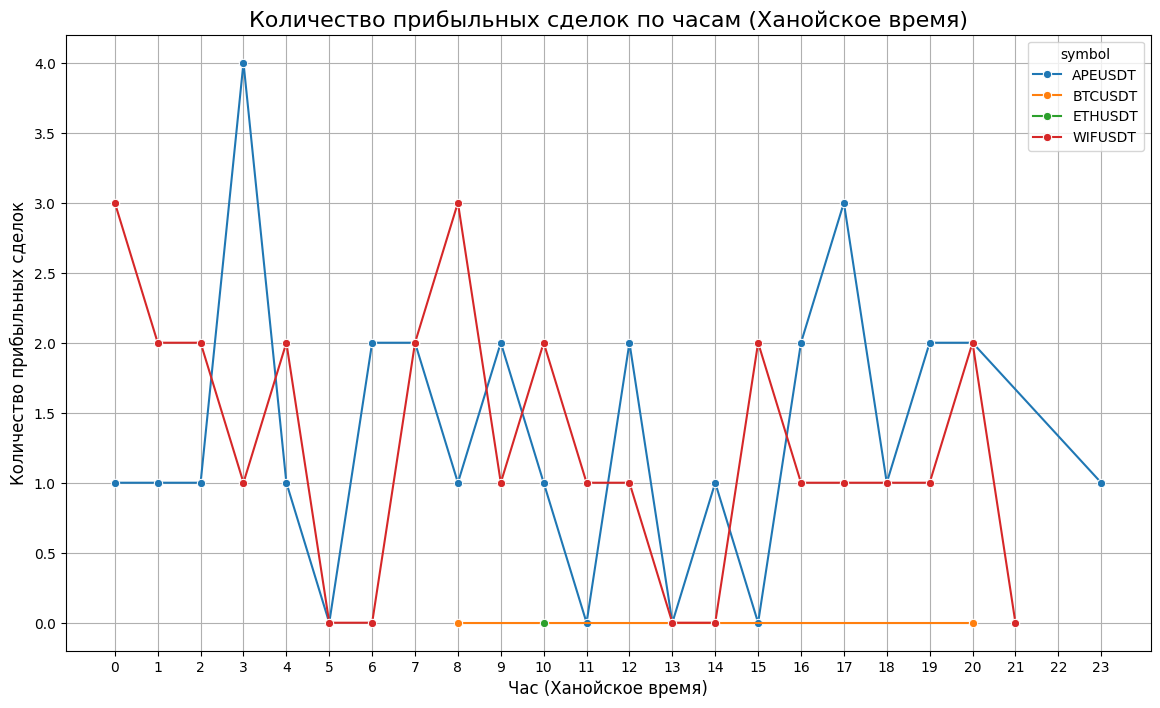

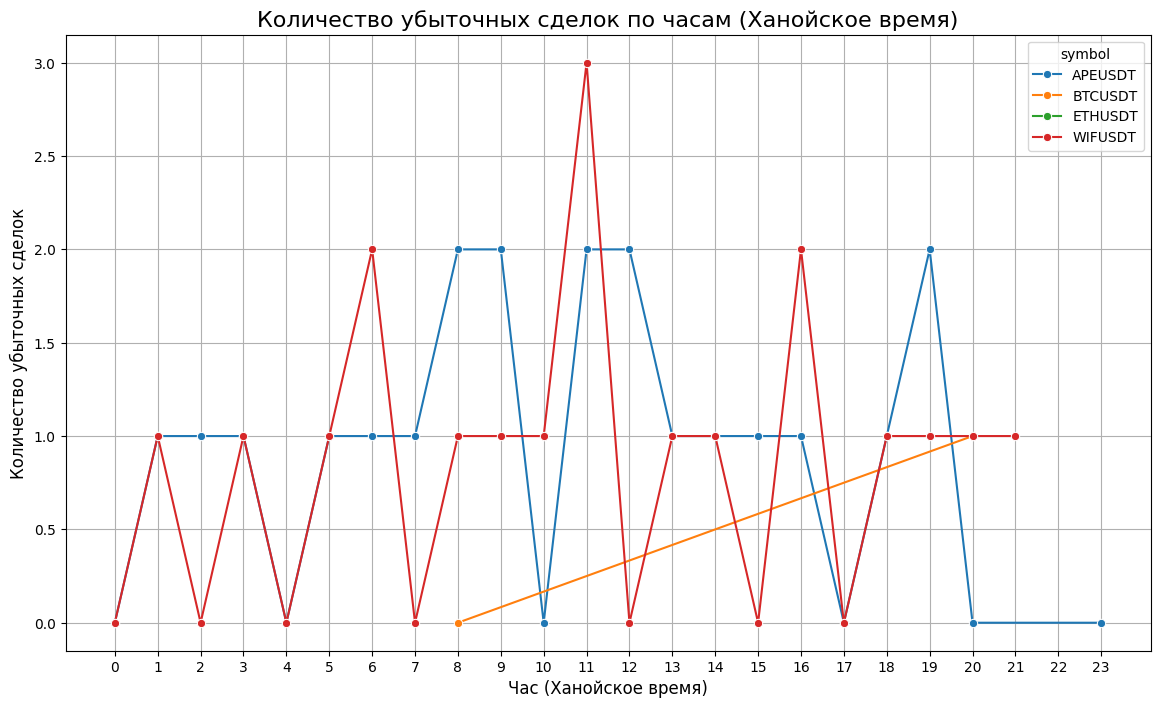

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настраиваем размер графика
plt.figure(figsize=(14, 8))

# Создаем график прибыльных сделок по часам
sns.lineplot(
    data=grouped_by_hour,
    x='hour_open_hanoi',
    y='positive_trades',
    hue='symbol',
    marker='o',
    palette='tab10'
)
plt.title('Количество прибыльных сделок по часам (Ханойское время)', fontsize=16)
plt.xlabel('Час (Ханойское время)', fontsize=12)
plt.ylabel('Количество прибыльных сделок', fontsize=12)
plt.xticks(range(0, 24))  # Метки для каждого часа
plt.grid(True)

# Отображаем график
plt.show()

# Теперь аналогичный график для убыточных сделок
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=grouped_by_hour,
    x='hour_open_hanoi',
    y='negative_trades',
    hue='symbol',
    marker='o',
    palette='tab10'
)
plt.title('Количество убыточных сделок по часам (Ханойское время)', fontsize=16)
plt.xlabel('Час (Ханойское время)', fontsize=12)
plt.ylabel('Количество убыточных сделок', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)

# Отображаем график
plt.show()


# Draft

In [ ]:
# Преобразуем время открытия и закрытия в datetime формат
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

# Вычисляем продолжительность сделки в минутах
df['trade_duration'] = (df['close_time'] - df['open_time']).dt.total_seconds() / 60

# Фильтрация закрытых сделок
closed_trades = df[df['status'] == 'CLOSED']

# Разделение на положительные и отрицательные сделки
positive_trades = closed_trades[closed_trades['result'] > 0]
negative_trades = closed_trades[closed_trades['result'] < 0]

# Анализ по каждой монете с подсчётом сделок, прибыли и убытков
coin_analysis = closed_trades.groupby('symbol').agg(
    total_trades=('id', 'count'),
    positive_trades=('result', lambda x: (x > 0).sum()),
    negative_trades=('result', lambda x: (x < 0).sum()),
    profit=('result', lambda x: x[x > 0].sum()),
    loss=('result', lambda x: x[x < 0].sum()),
    # Calculate total_profit using a lambda function that references the 'result' column directly
    total_profit=('result', lambda x: x[x > 0].sum() + x[x < 0].sum()),
    avg_trade_duration_min=('trade_duration', 'mean')
).reset_index()

# Сортировка по количеству сделок
coin_analysis = coin_analysis.sort_values(by='total_trades', ascending=False)

# Вывод результатов
print("Анализ по монетам (отсортирован по количеству сделок):")
display(coin_analysis)
print()
print(f"Всего положительных сделок: {len(positive_trades)}")
print(f"Всего отрицательных сделок: {len(negative_trades)}")


Анализ по монетам (отсортирован по количеству сделок):


,symbol,total_trades,positive_trades,negative_trades,profit,loss,total_profit,avg_trade_duration_min
0,APEUSDT,31,18,13,0.82960,-0.82080,0.00880,6.691500
1,WIFUSDT,30,19,11,0.71609,-0.47311,0.24298,5.407267



Всего положительных сделок: 37
Всего отрицательных сделок: 24


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from matplotlib.dates import DateFormatter
import os

In [ ]:
# Локализуем время в UTC, а затем конвертируем в часовой пояс Ханоя
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')  # Конвертация в datetime формат
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')  # Конвертация в datetime формат

# Локализация времени в UTC (если данные изначально в UTC)
df['open_time'] = df['open_time'].dt.tz_localize('UTC')
df['close_time'] = df['close_time'].dt.tz_localize('UTC')

# Конвертация времени в таймзону Ханоя (UTC+7)
hanoi_tz = pytz.timezone('Asia/Ho_Chi_Minh')
df['open_time_hanoi'] = df['open_time'].dt.tz_convert(hanoi_tz)
df['close_time_hanoi'] = df['close_time'].dt.tz_convert(hanoi_tz)

# Продолжение анализа и построения графиков


TypeError: '<=' not supported between instances of 'Timedelta' and 'int'

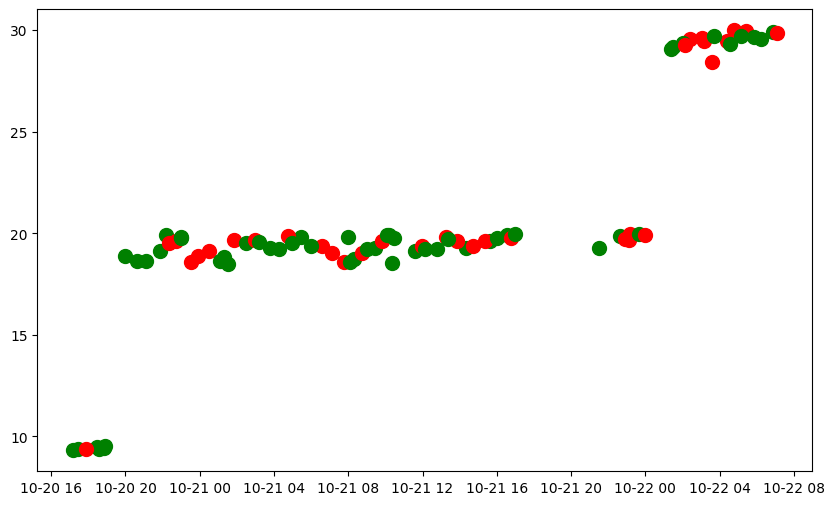

In [ ]:
import pandas as pd
import pytz
import matplotlib.pyplot as plt

# Загружаем данные из CSV
df = pd.read_csv('trades_data_3.csv')

# Конвертируем временные данные в формат datetime с учетом миллисекунд
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms', utc=True)
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms', utc=True)

# Конвертируем время в таймзону Ханоя
hanoi_tz = pytz.timezone('Asia/Ho_Chi_Minh')
df['open_time_hanoi'] = df['open_time'].dt.tz_convert(hanoi_tz)

# Группируем данные по каждой монете
grouped = df.groupby('symbol')

# Строим график для каждой монеты
for symbol, group in grouped:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Убираем синюю линию, строим только точки сделок
    for i, row in group.iterrows():
        color = 'green' if row['result'] > 0 else 'red'
        ax.scatter(row['open_time_hanoi'], row['order_size'], color=color, s=100)

    # Устанавливаем шаг по оси X в 30 минут
    ax.xaxis.set_major_locator(plt.MultipleLocator(pd.Timedelta(minutes=30)))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).strftime('%H:%M')))

    # Подробная шкала времени
    ax.set_xlabel('Время (Ханой)', fontsize=12)
    ax.set_ylabel('Размер сделки', fontsize=12)
    ax.set_title(f'Сделки по монете: {symbol}', fontsize=14)
    ax.grid(True)

    # Убираем легенду для чистоты графика
    ax.get_legend().remove()

    # Улучшаем отображение временной оси
    fig.autofmt_xdate()

    plt.show()



